## Objective: Leverage the Travel and Survey data to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

## Data to be used:
- Travel data & Survey data. 
- Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. 
- The survey data is aggregated data of surveys indicating the post-service experience

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

## Submission File Format: 

Submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

- ID
- Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In [1]:
#pip install statsmodels

In [1]:
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import miceforest as mf
from sklearn.impute import KNNImputer

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_travel_Train = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Hackathon/Data/Traveldata_train.csv')
df_travel_Test = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Hackathon/Data/Traveldata_test.csv')
#df_travel.head()

In [4]:
df_survey_Train = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Hackathon/Data/Surveydata_train.csv')
df_survey_Test = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Hackathon/Data/Surveydata_test.csv')
#df_survey.head()

In [5]:
# Rows in Travel Train data
print("number of rows in Travel Train dataset: ", df_travel_Train.shape[0])

# Columns in Travel data
print("number of columns in Travel Train dataset: ", df_travel_Train.shape[1])

# Rows in Survey data
print("number of rows in Survey Train dataset : ", df_survey_Train.shape[0])

# Columns in Survey data
print("number of rows in Survey Train dataset : ", df_survey_Train.shape[1])

number of rows in Travel Train dataset:  94379
number of columns in Travel Train dataset:  9
number of rows in Survey Train dataset :  94379
number of rows in Survey Train dataset :  17


In [6]:
# Rows in Travel Test data
print("number of rows in Travel Test dataset: ", df_travel_Test.shape[0])

# Columns in Travel data
print("number of columns in Travel Test dataset: ", df_travel_Test.shape[1])

# Rows in Survey data
print("number of rows in Survey Test dataset : ", df_survey_Test.shape[0])

# Columns in Survey data
print("number of rows in Survey Test dataset : ", df_survey_Test.shape[1])

number of rows in Travel Test dataset:  35602
number of columns in Travel Test dataset:  9
number of rows in Survey Test dataset :  35602
number of rows in Survey Test dataset :  16


In [7]:
df_Train = pd.merge(df_travel_Train,df_survey_Train,on="ID",how="inner")
df_Test = pd.merge(df_travel_Test,df_survey_Test,on="ID",how="inner")


# Rows in Merged Train data
print("number of rows in Survey dataset : ", df_Train.shape[0])
# Columns in Merged Train data
print("number of rows in Survey dataset : ", df_Train.shape[1])

# Rows in Merged Test data
print("number of rows in Survey dataset : ", df_Test.shape[0])
# Columns in Merged Train data
print("number of rows in Survey dataset : ", df_Test.shape[1])

number of rows in Survey dataset :  94379
number of rows in Survey dataset :  25
number of rows in Survey dataset :  35602
number of rows in Survey dataset :  24


#### Overall Experience column isn't there in Test data, so 1 column less 

In [8]:
df_Train.head()

df_Test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [9]:
#Checking the columns in the dataset
print(df_Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [10]:
print(df_Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [11]:
print("Count total NaN at each column in the Train DataFrame: \n ", df_Train.isnull().sum())

Count total NaN at each column in the Train DataFrame: 
  ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64


In [12]:
print("Count total NaN at each column in the Test DataFrame: \n ", df_Test.isnull().sum())

Count total NaN at each column in the Test DataFrame: 
  ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64


In [13]:
duplicate_Train = df_Train[df_Train.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate_Train

Duplicate Rows :


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [14]:
duplicate_Test = df_Test[df_Test.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate_Test

Duplicate Rows :


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [15]:
df_Train['ID'].nunique()

df_Test['ID'].nunique()

94379

35602

## EDA - Univariate and Bivariate analysis 

In [16]:
df_Train[['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins','Overall_Experience']].describe().applymap('{:,.1f}'.format).T

,count,mean,std,min,25%,50%,75%,max
Age,"94,346.0",39.4,15.1,7.0,27.0,40.0,51.0,85.0
Travel_Distance,"94,379.0","1,978.9","1,028.0",50.0,"1,359.0","1,923.0","2,538.0","6,951.0"
Departure_Delay_in_Mins,"94,322.0",14.6,38.1,0.0,0.0,0.0,12.0,"1,592.0"
Arrival_Delay_in_Mins,"94,022.0",15.0,38.4,0.0,0.0,0.0,13.0,"1,584.0"
Overall_Experience,"94,379.0",0.5,0.5,0.0,0.0,1.0,1.0,1.0


In [28]:
#pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
#file_name = 'Data_Merged.xlsx'
 
# saving the excel
#df.to_excel(file_name)

In [74]:
#df["Departure_delay_quintiles"] = pd.qcut(df["Departure_Delay_in_Mins"], 5,duplicates='drop')
#df["Arrival_Delay_quintiles"] = pd.qcut(df["Arrival_Delay_in_Mins"], 5,duplicates='drop')
#df.shape[0]
#df.head()

In [75]:
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist
#numeric_columns

In [76]:
#object_columns = df.select_dtypes(include=['object']).columns.tolist
#object_columns

In [17]:
columns=['Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Class','Overall_Experience']

for col in columns:
    print("-----------Column is:",col,"---------------")
    #pd.set_option('display.float_format', '{:.1%}'.format)
    display(df_Train[col].value_counts(normalize=True))

-----------Column is: Gender ---------------


Gender
Female    0.507041
Male      0.492959
Name: proportion, dtype: float64

-----------Column is: Customer_Type ---------------


Customer_Type
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: proportion, dtype: float64

-----------Column is: Type_Travel ---------------


Type_Travel
Business Travel    0.688373
Personal Travel    0.311627
Name: proportion, dtype: float64

-----------Column is: Travel_Class ---------------


Travel_Class
Eco         0.522807
Business    0.477193
Name: proportion, dtype: float64

-----------Column is: Seat_Class ---------------


Seat_Class
Green Car    0.502601
Ordinary     0.497399
Name: proportion, dtype: float64

-----------Column is: Overall_Experience ---------------


Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64

<Axes: xlabel='Overall_Experience', ylabel='count'>

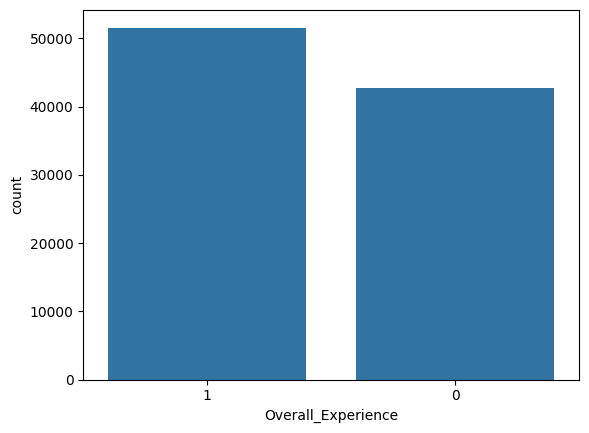

In [18]:
#Distribution of the even variables values - 0 and 1
figsize=(2,2)
#fig.suptitle('Bar plot of the Status variable', fontsize = 12)
sns.countplot(x = 'Overall_Experience', data = df_Train, order = df_Train['Overall_Experience'].value_counts(normalize=True).index)

#### Findings and Observations on the Univariate analysis:
1. Male and Femail split is very even among customers, though Female travelers slightly more than Male
2. 80% of the Travelers are Loyal customers
3. ~69% of the Travelers avail the train for Business purpose, possibly for traveling to office
4. 52% of the Travelers travel in Economy class. The split between Green and Ordinary seats is quite equal
5. 54% of the Travelers have overall Satisfactory experience (Overall experience=1). The dataset doesnt seem imbalanced because of the 54% Satisfactory rate

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Overall_Experience      0      1    All
Gender                                 
All                 42747  51555  94302
Male                26111  20376  46487
Female              16636  31179  47815
------------------------------------------------------------------------------------------------------------------------


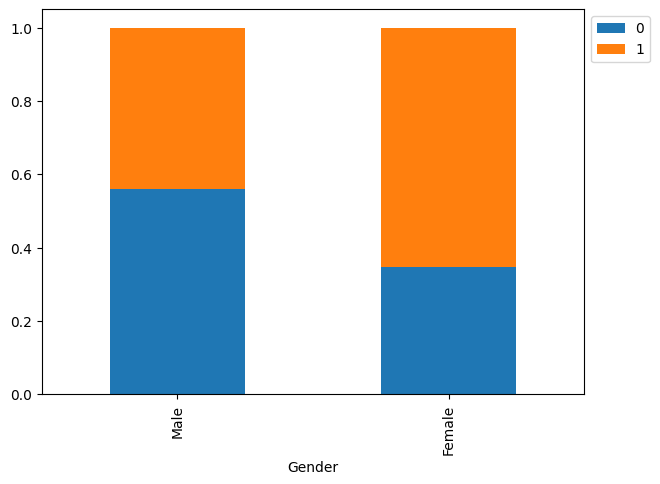

In [20]:
stacked_barplot(df_Train, "Gender", "Overall_Experience")

Overall_Experience      0      1    All
Customer_Type                          
All                 38663  46765  85428
Loyal Customer      26794  43029  69823
Disloyal Customer   11869   3736  15605
------------------------------------------------------------------------------------------------------------------------


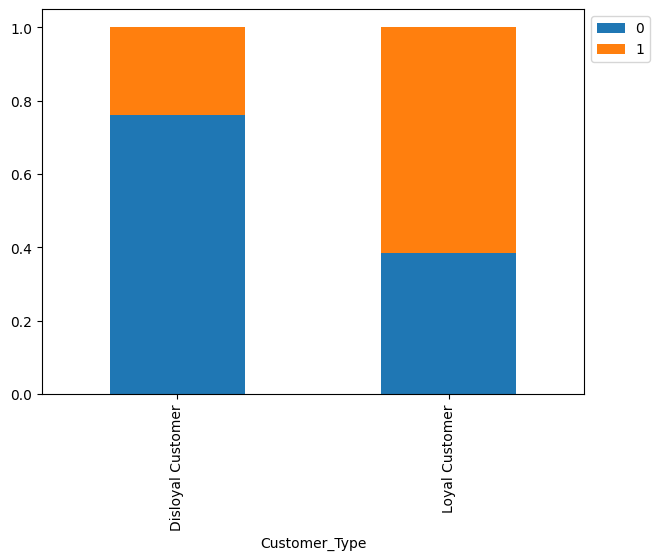

In [21]:
stacked_barplot(df_Train, "Customer_Type", "Overall_Experience")

Overall_Experience      0      1    All
Type_Travel                            
All                 38600  46553  85153
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
------------------------------------------------------------------------------------------------------------------------


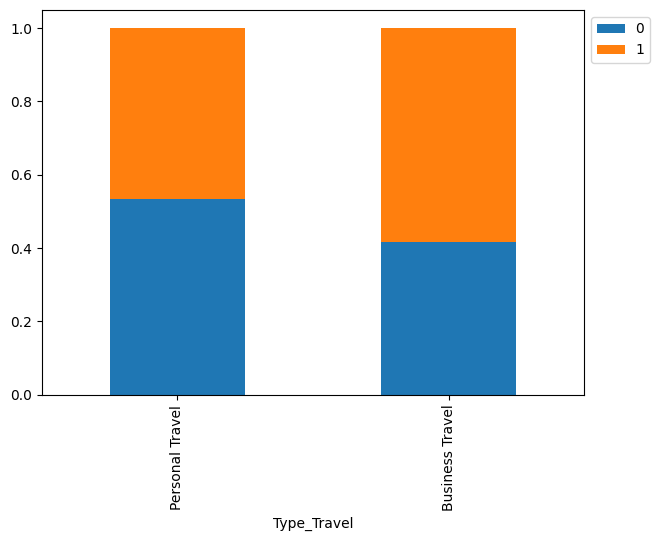

In [22]:
stacked_barplot(df_Train, "Type_Travel", "Overall_Experience")

Overall_Experience      0      1    All
Travel_Class                           
All                 42786  51593  94379
Eco                 29644  19698  49342
Business            13142  31895  45037
------------------------------------------------------------------------------------------------------------------------


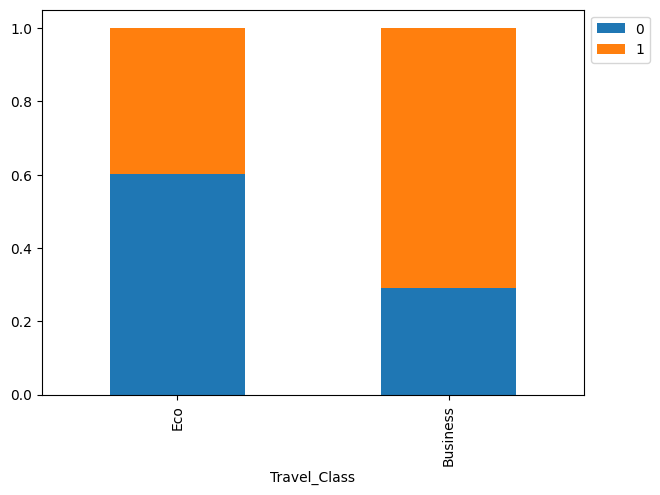

In [23]:
stacked_barplot(df_Train, "Travel_Class", "Overall_Experience")

Overall_Experience      0      1    All
Seat_Class                             
All                 42786  51593  94379
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
------------------------------------------------------------------------------------------------------------------------


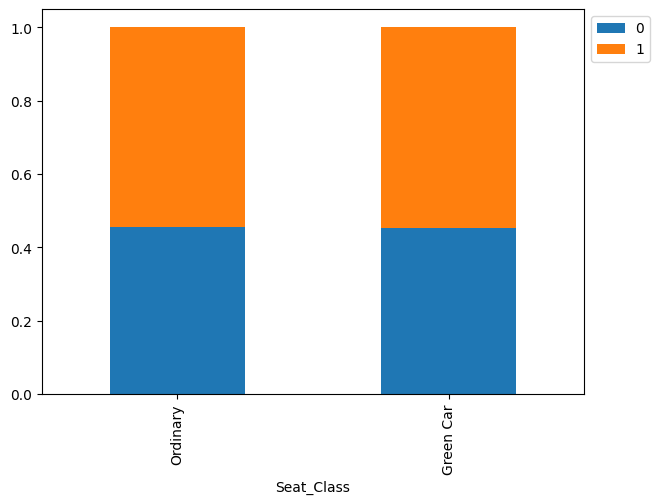

In [24]:
stacked_barplot(df_Train, "Seat_Class", "Overall_Experience")

#### Obsevations on the Stacked Bar charts (Bivariate analysis):
1. Female customers, Loyal travelers and customers availing Business travel class have given more overall Satisfactory rating (overall experience=1) than the corresponding Male customers, Disloyal travelers and Economy travel class holders respectively
2. For other categories, no such distinction visible

Text(0.5, 0.98, 'Graphs for Age and Travel_Distance ')

<Axes: xlabel='Age', ylabel='Count'>

<Axes: xlabel='Age'>

<Axes: xlabel='Travel_Distance', ylabel='Count'>

<Axes: xlabel='Travel_Distance'>

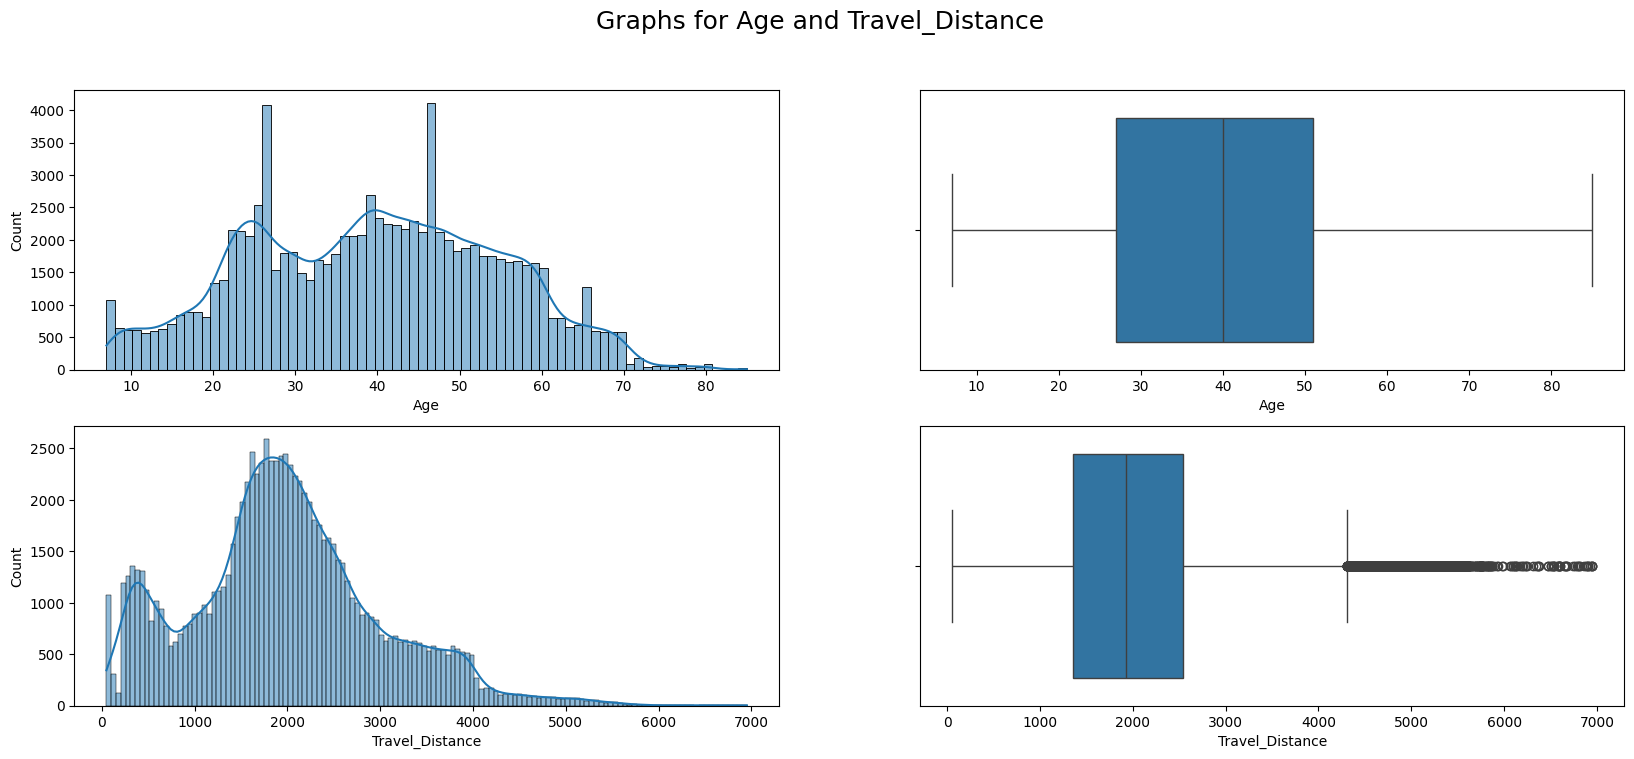

In [25]:
#Histogram and Boxplot for the numerical variables - Age and Travel_Distance 
fig, axes = plt.subplots(2, 2, figsize = (20, 8))
fig.suptitle('Graphs for Age and Travel_Distance ', fontsize = 18)

sns.histplot(x = 'Age', data = df_Train, kde = True, ax = axes[0,0]);
sns.boxplot(x = 'Age', data = df_Train, ax = axes[0,1])

sns.histplot(x = 'Travel_Distance', data = df_Train, kde = True, ax = axes[1,0]);
sns.boxplot(x = 'Travel_Distance', data = df_Train, ax = axes[1,1])

In [26]:
def chart_func(variable,status,data):
    fig, axes = plt.subplots(1, 3, figsize = (15, 6))
    fig.suptitle("Distribution by the variable: " + str.title(variable))
    axes[0].set_title("Distribution for status=1")
    sns.histplot(x = variable, data = df_Train[df_Train['Overall_Experience']==1], kde = True, ax = axes[0]);
    axes[1].set_title("Distribution for status=0")
    sns.histplot(x = variable, data = df_Train[df_Train['Overall_Experience']==0], kde = True, ax = axes[1]);
    axes[2].set_title("Boxplot by status values")
    sns.boxplot(x=status, y = variable, data = df_Train, ax = axes[2]);

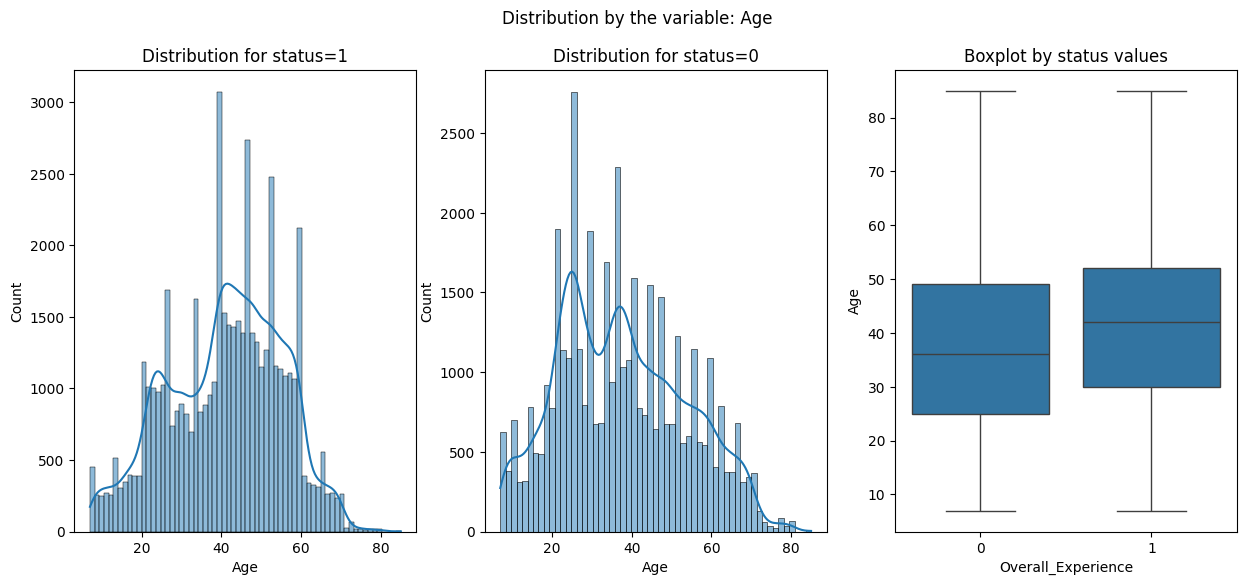

In [27]:
chart_func('Age','Overall_Experience',df_Train)

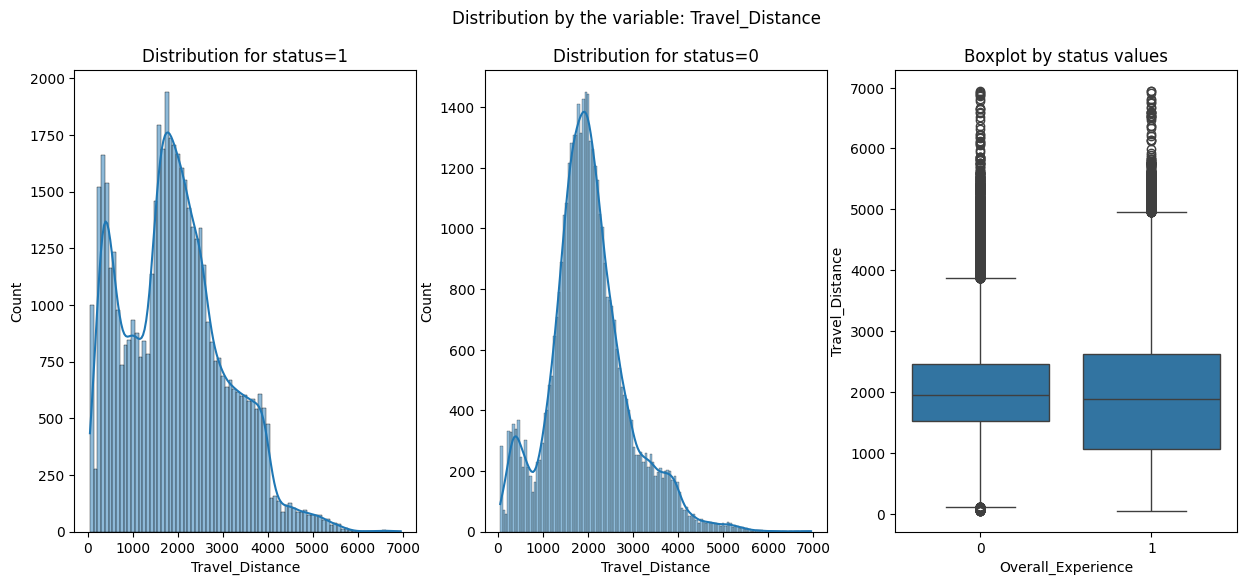

In [28]:
chart_func('Travel_Distance','Overall_Experience',df_Train)

In [40]:
#df1 = df.replace(np.nan,'Blank')
#df[df["Gender"].isna()==True]



## Train dataset Data Handling

In [29]:
df_Train_copy = df_Train.copy(deep = True)

In [30]:
df_Train_copy.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [31]:
event_dictionary ={'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2,'Acceptable':3, 'Good':4,'Excellent':5}

Rating_cols = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

for col in Rating_cols:
    df_Train_copy[col] = df_Train_copy[col].map(event_dictionary)
    

df_Train_copy.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [32]:
event_dictionary2 ={'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2,'Manageable':3, 'Convenient':4,'Very Convenient':5}

df_Train_copy['Platform_Location'] = df_Train_copy['Platform_Location'].map(event_dictionary2)

df_Train_copy.head()


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [33]:
df_Train_copy_v2=df_Train_copy.drop(['Gender','Customer_Type','Type_Travel','Travel_Class','Overall_Experience','Seat_Class'], axis=1)

In [34]:
# Create kernels.  #mice forest
kernel = mf.ImputationKernel(
  data=df_Train_copy_v2,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)
print(kernel)
completed_dataset = kernel.complete_data(dataset=0, inplace=False)


#Knn Imputation

impute = KNNImputer() #KNN imputation
KNNImputed = impute.fit_transform(df_Train_copy_v2)
KNNImputed = pd.DataFrame(KNNImputed, columns = df_Train_copy_v2.columns).round(1)

Initialized logger with name mice 1-3
Dataset 0
1  | Cleanliness | Online_Boarding | Onboard_Entertainment | Platform_Location | Onboard_Wifi_Service | Age | Departure_Delay_in_Mins | Seat_Comfort | Ease_of_Online_Booking | CheckIn_Service | Legroom | Online_Support | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Catering | Arrival_Time_Convenient
2  | Cleanliness | Online_Boarding | Onboard_Entertainment | Platform_Location | Onboard_Wifi_Service | Age | Departure_Delay_in_Mins | Seat_Comfort | Ease_of_Online_Booking | CheckIn_Service | Legroom | Online_Support | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Catering | Arrival_Time_Convenient
3  | Cleanliness | Online_Boarding | Onboard_Entertainment | Platform_Location | Onboard_Wifi_Service | Age | Departure_Delay_in_Mins | Seat_Comfort | Ease_of_Online_Booking | CheckIn_Service | Legroom | Online_Support | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Catering | Arrival_Time_Convenient



In [29]:
#df_Train_copy_v2.info()

In [25]:
#mice =  np.sum(np.abs(completed_dataset[df_Train_copy_v2.isnull().any(axis=1)] - df_Train_copy_v2[df_Train_copy_v2.isnull().any(axis=1)]))
#Knn =   np.sum(np.abs(KNNImputed[df_Train_copy_v2.isnull().any(axis=1)] -        df_Train_copy_v2[df_Train_copy_v2.isnull().any(axis=1)]))
#mice
#Knn
#for i in [mice, Knn]:
#    print(np.sum(i))

<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

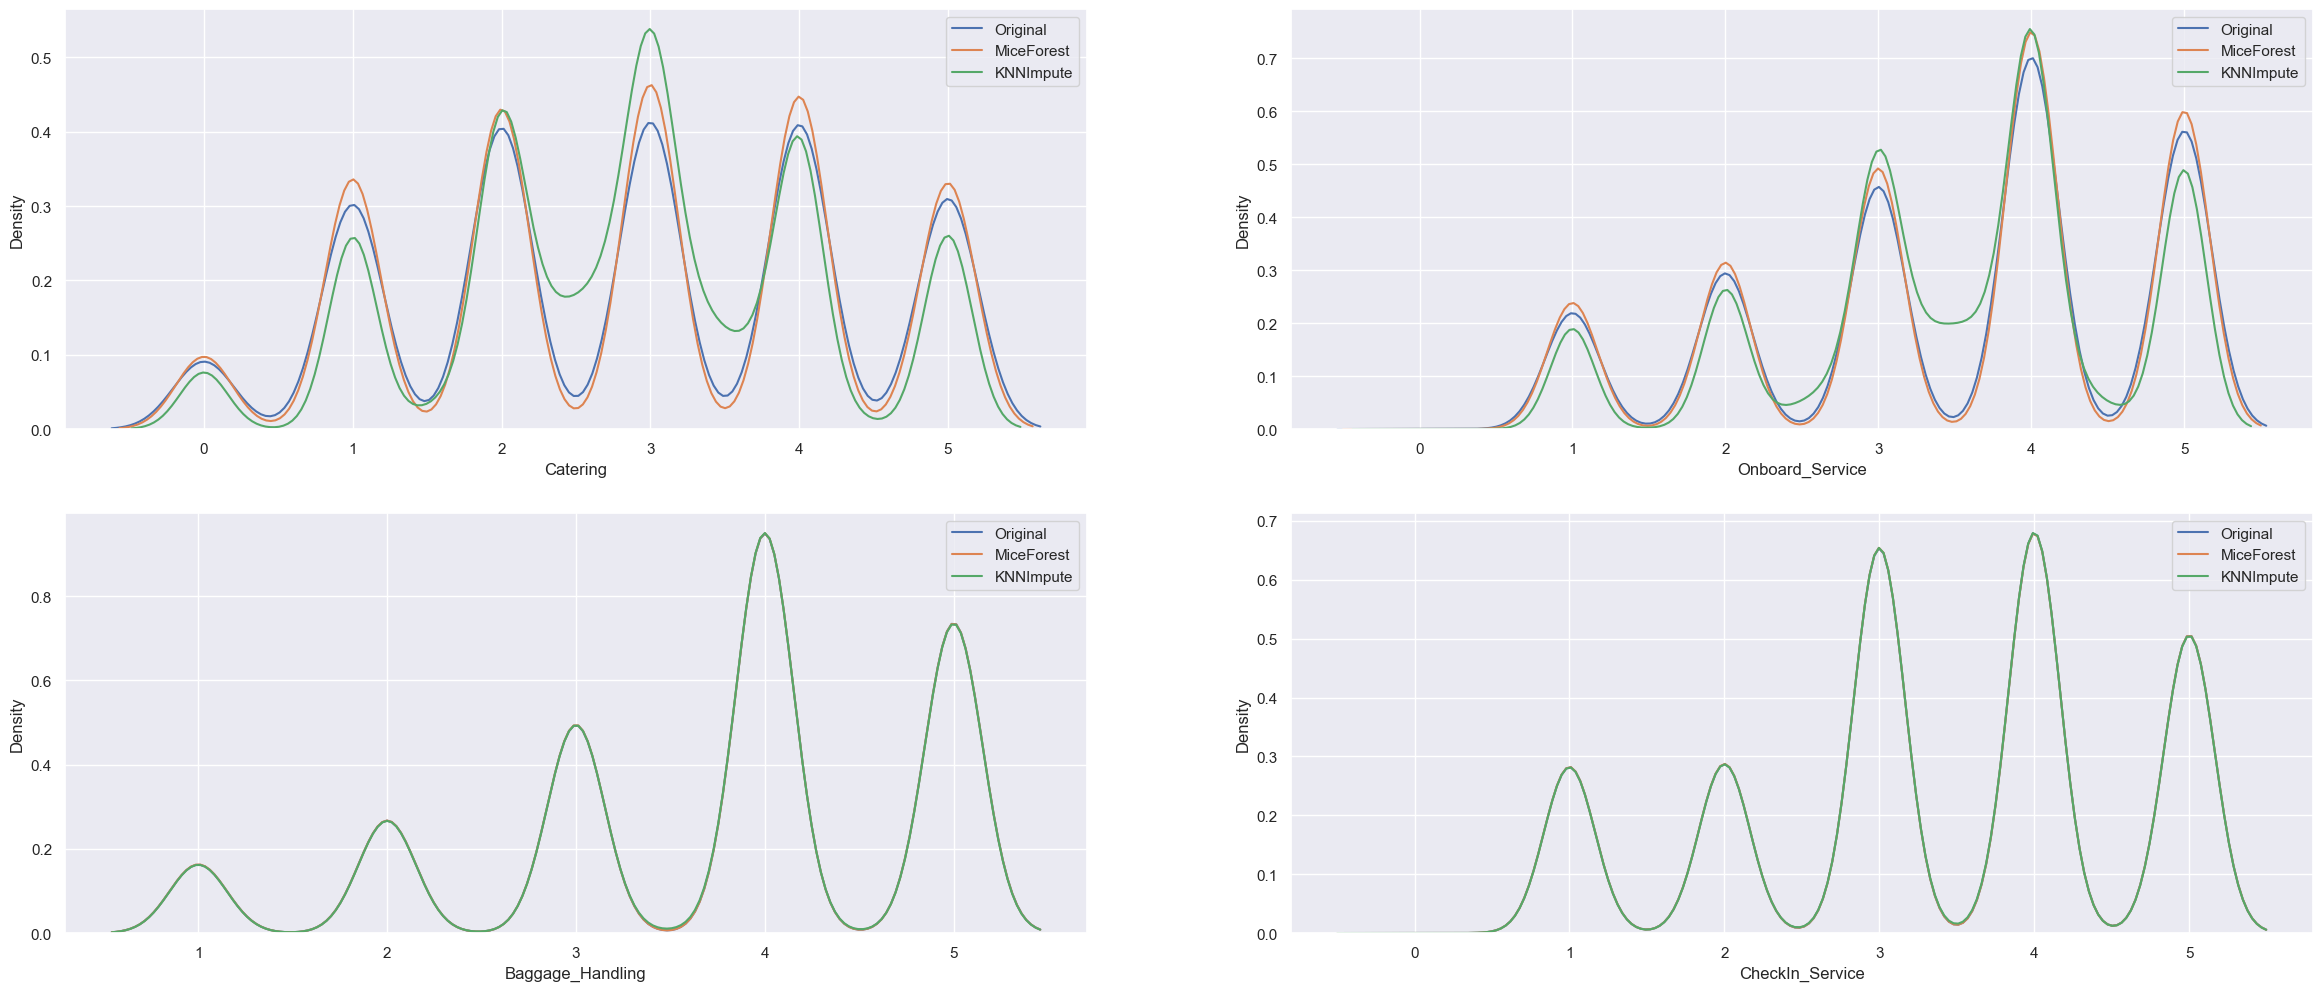

In [35]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(29,12),nrows=2, ncols=2)
for col,i,j in zip(['Catering','Onboard_Service', 'Baggage_Handling','CheckIn_Service'],[0,0,1,1],[0,1,0,1]):
    sns.kdeplot(x = df_Train_copy_v2[col][df_Train_copy_v2.isnull().any(axis=1)], label= 'Original', ax=ax[i][j] )
    
    sns.kdeplot(x = completed_dataset[col][df_Train_copy_v2.isnull().any(axis=1)], label = 'MiceForest', ax=ax[i][j] )
    sns.kdeplot(x = KNNImputed[col][df_Train_copy_v2.isnull().any(axis=1)], label='KNNImpute',  ax=ax[i][j] )
    ax[i][j].legend()

#### MICE is performing better than KNN as the values imputed using MICE technique are closer to the Original values than the values imputed using KNN technique 

In [36]:
selected_columns =['ID','Gender','Customer_Type','Type_Travel','Travel_Class','Overall_Experience','Seat_Class']
Train_new_df = df_Train_copy[selected_columns].copy()
Train_new_df.head()

,ID,Gender,Customer_Type,Type_Travel,Travel_Class,Overall_Experience,Seat_Class
0,98800001,Female,Loyal Customer,NaN,Business,0,Green Car
1,98800002,Male,Loyal Customer,Personal Travel,Eco,0,Ordinary
2,98800003,Female,Loyal Customer,Business Travel,Business,1,Green Car
3,98800004,Female,Loyal Customer,Business Travel,Business,0,Ordinary
4,98800005,Female,Loyal Customer,Business Travel,Business,1,Ordinary


In [37]:
#Using MICE technique to impute/treat the missing values in Numerical variables and the Survey feedback variables
df_Train_v2 = pd.merge(Train_new_df,completed_dataset,on="ID",how="inner")

# Rows in Merged data
print("number of rows in Survey dataset : ", df_Train_v2.shape[0])

# Columns in Merged data
print("number of rows in Survey dataset : ", df_Train_v2.shape[1])

df_Train_v2.head()

number of rows in Survey dataset :  94379
number of rows in Survey dataset :  25


,ID,Gender,Customer_Type,Type_Travel,Travel_Class,Overall_Experience,Seat_Class,Age,Travel_Distance,Departure_Delay_in_Mins,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,NaN,Business,0,Green Car,52.0,272,0.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,Personal Travel,Eco,0,Ordinary,48.0,2200,9.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,Business Travel,Business,1,Green Car,43.0,1061,77.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,Business Travel,Business,0,Ordinary,44.0,780,13.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,Business Travel,Business,1,Ordinary,50.0,1981,0.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [38]:
df_Train_v2['Gender'].mode()[0]
df_Train_v2['Type_Travel'].mode()[0]
df_Train_v2['Customer_Type'].mode()[0]

'Female'

'Business Travel'

'Loyal Customer'

In [39]:
#Filling the missing values in categorical variables by the Mode value of the variables
df_Train_v2['Gender'] = df_Train_v2['Gender'].fillna(df_Train_v2['Gender'].mode()[0])
df_Train_v2['Type_Travel'] = df_Train_v2['Type_Travel'].fillna(df_Train_v2['Type_Travel'].mode()[0])
df_Train_v2['Customer_Type'] = df_Train_v2['Customer_Type'].fillna(df_Train_v2['Customer_Type'].mode()[0])

In [40]:
print("Count total NaN at each column in a DataFrame: \n ", df_Train_v2.isnull().sum())

Count total NaN at each column in a DataFrame: 
  ID                         0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Overall_Experience         0
Seat_Class                 0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


#### No Blank value in any of the columns. All the columns have been corrected for missing values

In [28]:
file_name = 'Post_Imputation_Train.xlsx'
 
# saving the excel
df_Train_v2.to_excel(file_name)

### Train dataset Data handling section ends

## Evaluating the imputed Train dataset 

In [41]:
EDA_cols = ['Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

for col in EDA_cols:
    print("-----------Column is:",col,"---------------")
    #pd.set_option('display.float_format', '{:.1%}'.format)
    display(df_Train_v2[col].value_counts(normalize=True).sort_index())

-----------Column is: Platform_Location ---------------


Platform_Location
0.0    0.000021
1.0    0.174308
2.0    0.189004
3.0    0.256212
4.0    0.232308
5.0    0.148147
Name: proportion, dtype: float64

-----------Column is: Seat_Comfort ---------------


Seat_Comfort
0.0    0.036724
1.0    0.161000
2.0    0.222104
3.0    0.224372
4.0    0.218301
5.0    0.137499
Name: proportion, dtype: float64

-----------Column is: Arrival_Time_Convenient ---------------


Arrival_Time_Convenient
0.0    0.050604
1.0    0.160735
2.0    0.175664
3.0    0.177137
4.0    0.228430
5.0    0.207430
Name: proportion, dtype: float64

-----------Column is: Catering ---------------


Catering
0.0    0.045561
1.0    0.162176
2.0    0.208436
3.0    0.217156
4.0    0.210142
5.0    0.156528
Name: proportion, dtype: float64

-----------Column is: Onboard_Wifi_Service ---------------


Onboard_Wifi_Service
0.0    0.000964
1.0    0.113849
2.0    0.207684
3.0    0.213247
4.0    0.242035
5.0    0.222221
Name: proportion, dtype: float64

-----------Column is: Onboard_Entertainment ---------------


Onboard_Entertainment
0.0    0.022728
1.0    0.091567
2.0    0.147596
3.0    0.186090
4.0    0.322678
5.0    0.229341
Name: proportion, dtype: float64

-----------Column is: Online_Support ---------------


Online_Support
0.0    0.000011
1.0    0.107778
2.0    0.132667
3.0    0.166562
4.0    0.318302
5.0    0.274680
Name: proportion, dtype: float64

-----------Column is: Ease_of_Online_Booking ---------------


Ease_of_Online_Booking
0.0    0.000170
1.0    0.103572
2.0    0.153477
3.0    0.173778
4.0    0.306625
5.0    0.262378
Name: proportion, dtype: float64

-----------Column is: Onboard_Service ---------------


Onboard_Service
0.0    0.000042
1.0    0.101273
2.0    0.131184
3.0    0.208193
4.0    0.313979
5.0    0.245330
Name: proportion, dtype: float64

-----------Column is: Legroom ---------------


Legroom
0.0    0.003602
1.0    0.086089
2.0    0.167103
3.0    0.173767
4.0    0.306127
5.0    0.263311
Name: proportion, dtype: float64

-----------Column is: Baggage_Handling ---------------


Baggage_Handling
1.0    0.061211
2.0    0.103561
3.0    0.188580
4.0    0.370792
5.0    0.275856
Name: proportion, dtype: float64

-----------Column is: CheckIn_Service ---------------


CheckIn_Service
0.0    0.000011
1.0    0.118109
2.0    0.118988
3.0    0.273673
4.0    0.280952
5.0    0.208267
Name: proportion, dtype: float64

-----------Column is: Cleanliness ---------------


Cleanliness
0.0    0.000053
1.0    0.059685
2.0    0.103900
3.0    0.184914
4.0    0.375401
5.0    0.276047
Name: proportion, dtype: float64

-----------Column is: Online_Boarding ---------------


Online_Boarding
0.0    0.000127
1.0    0.118268
2.0    0.142521
3.0    0.238146
4.0    0.270547
5.0    0.230390
Name: proportion, dtype: float64

In [42]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

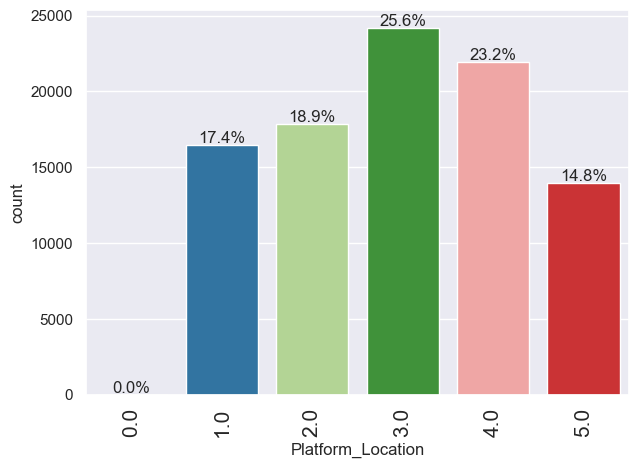

In [43]:
labeled_barplot(df_Train_v2, "Platform_Location", perc=True)

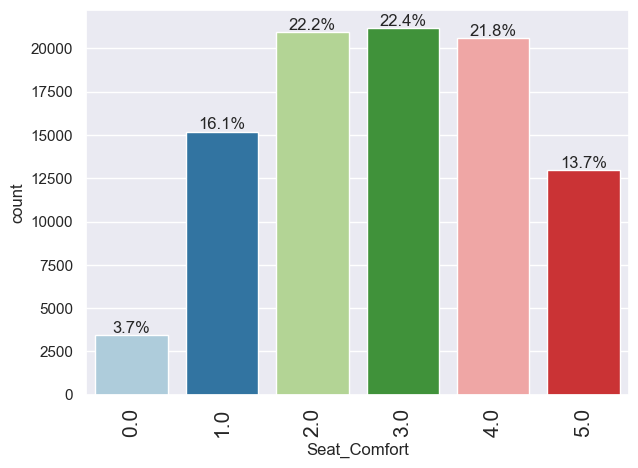

In [44]:
labeled_barplot(df_Train_v2, "Seat_Comfort", perc=True)

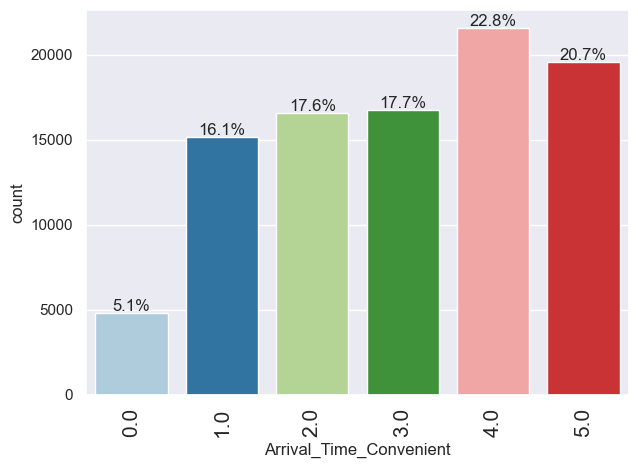

In [45]:
labeled_barplot(df_Train_v2, "Arrival_Time_Convenient", perc=True)

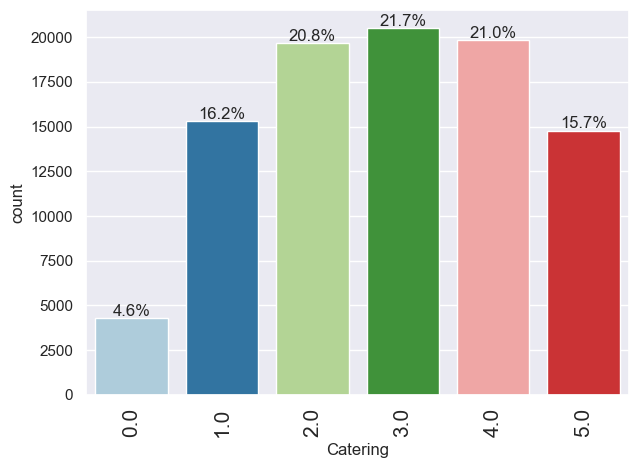

In [46]:
labeled_barplot(df_Train_v2, "Catering", perc=True)

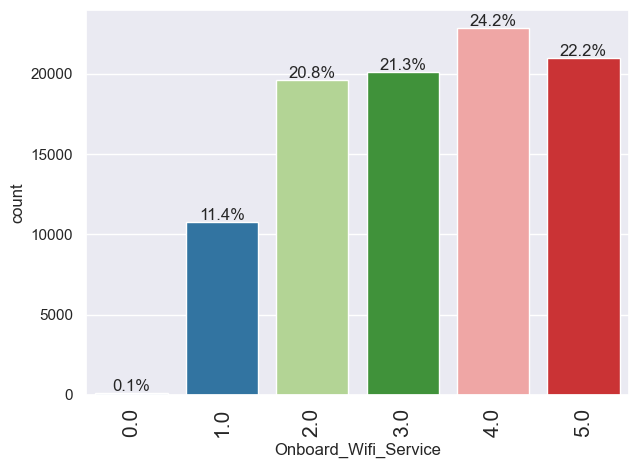

In [47]:
labeled_barplot(df_Train_v2, "Onboard_Wifi_Service", perc=True)

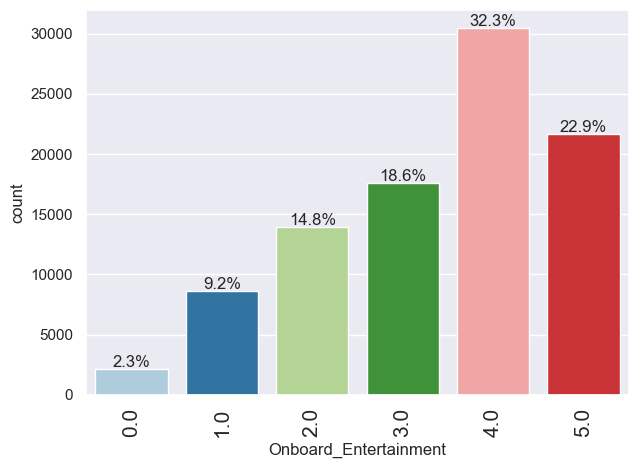

In [48]:
labeled_barplot(df_Train_v2, "Onboard_Entertainment", perc=True)

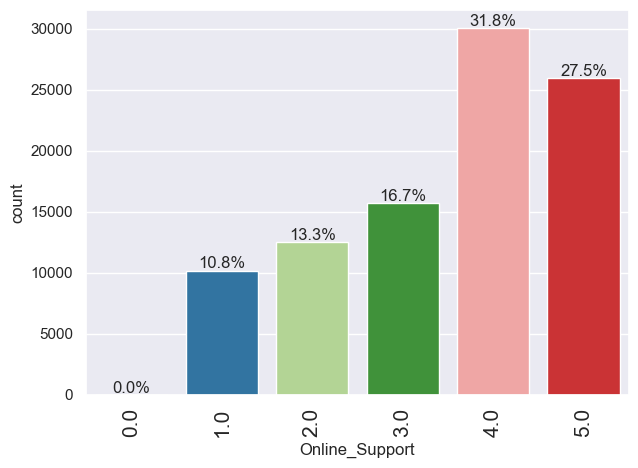

In [49]:
labeled_barplot(df_Train_v2, "Online_Support", perc=True)

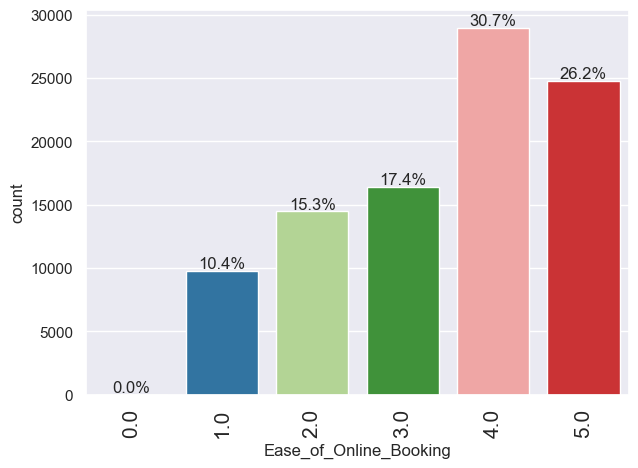

In [50]:
labeled_barplot(df_Train_v2, "Ease_of_Online_Booking", perc=True)

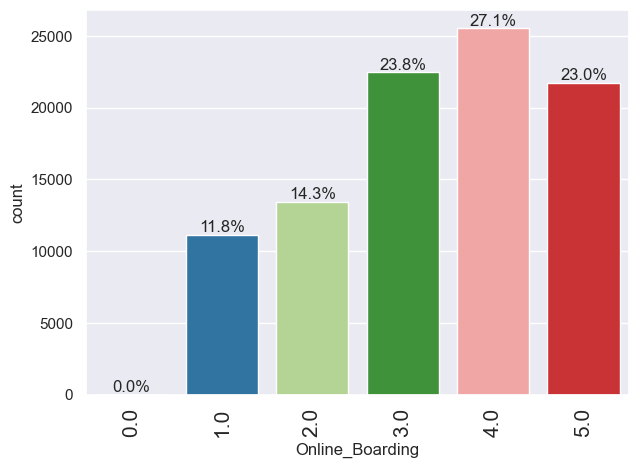

In [51]:
labeled_barplot(df_Train_v2, "Online_Boarding", perc=True)

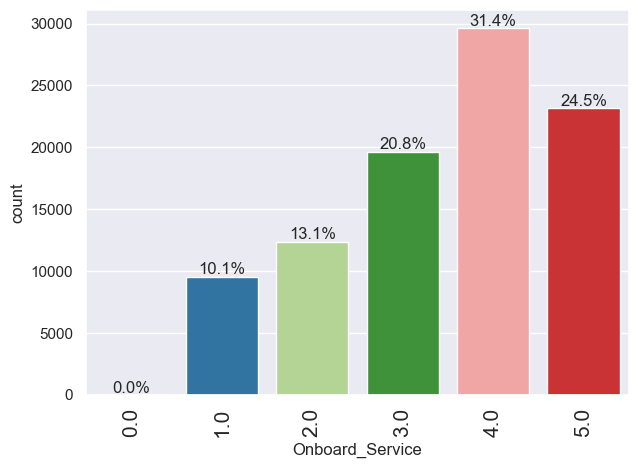

In [52]:
labeled_barplot(df_Train_v2, "Onboard_Service", perc=True)

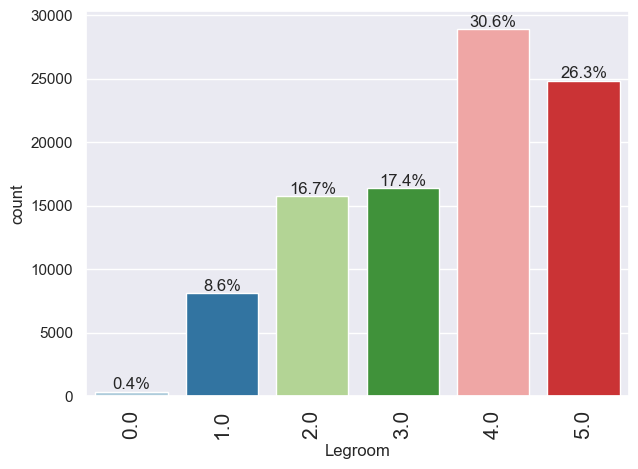

In [53]:
labeled_barplot(df_Train_v2, "Legroom", perc=True)

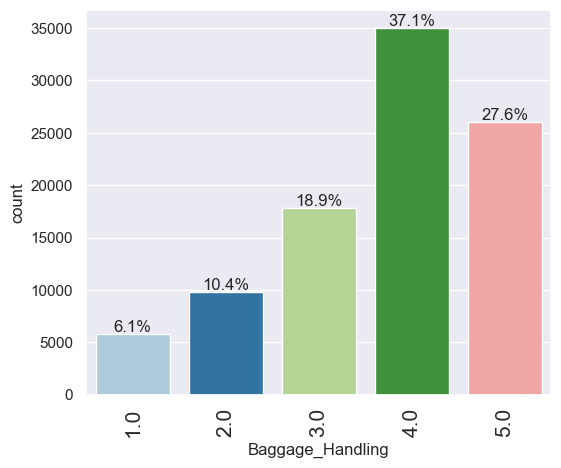

In [54]:
labeled_barplot(df_Train_v2, "Baggage_Handling", perc=True)

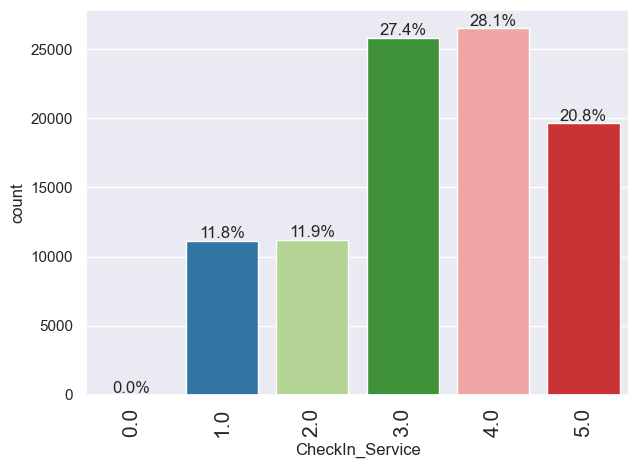

In [55]:
labeled_barplot(df_Train_v2, "CheckIn_Service", perc=True)

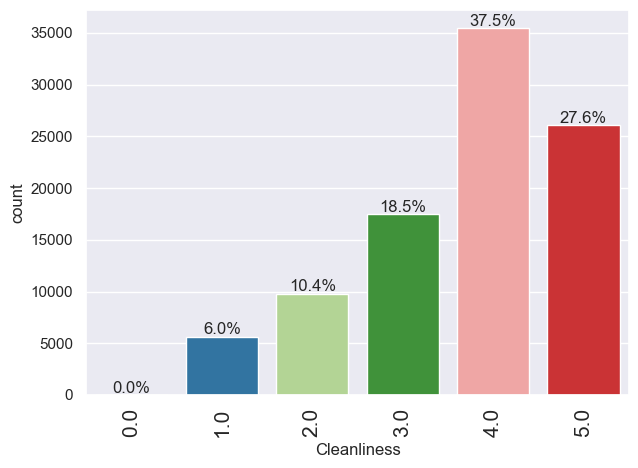

In [56]:
labeled_barplot(df_Train_v2, "Cleanliness", perc=True)

#### Findings and Observations on the Survey ratings (post imputation):
1. Dimensions where the ratings are indexed more towards Good and Excellent service include Arrival time, Online support, Onboard entertainment, Ease of Online booking, Onboard Service, Legroom, Baggage Handling, Cleanliness

2. Dimensions where the ratings are indexed more towards Average include Platform location, Seat comfort, Catering. These are definetly improvement areas to be prioritized.

3. The areas where customer ratings are evenly distributed across Average, Good and Excellent are Onboard wifi service, Online boarding, Check-in service

The correlation heatmap for the numerical variables:


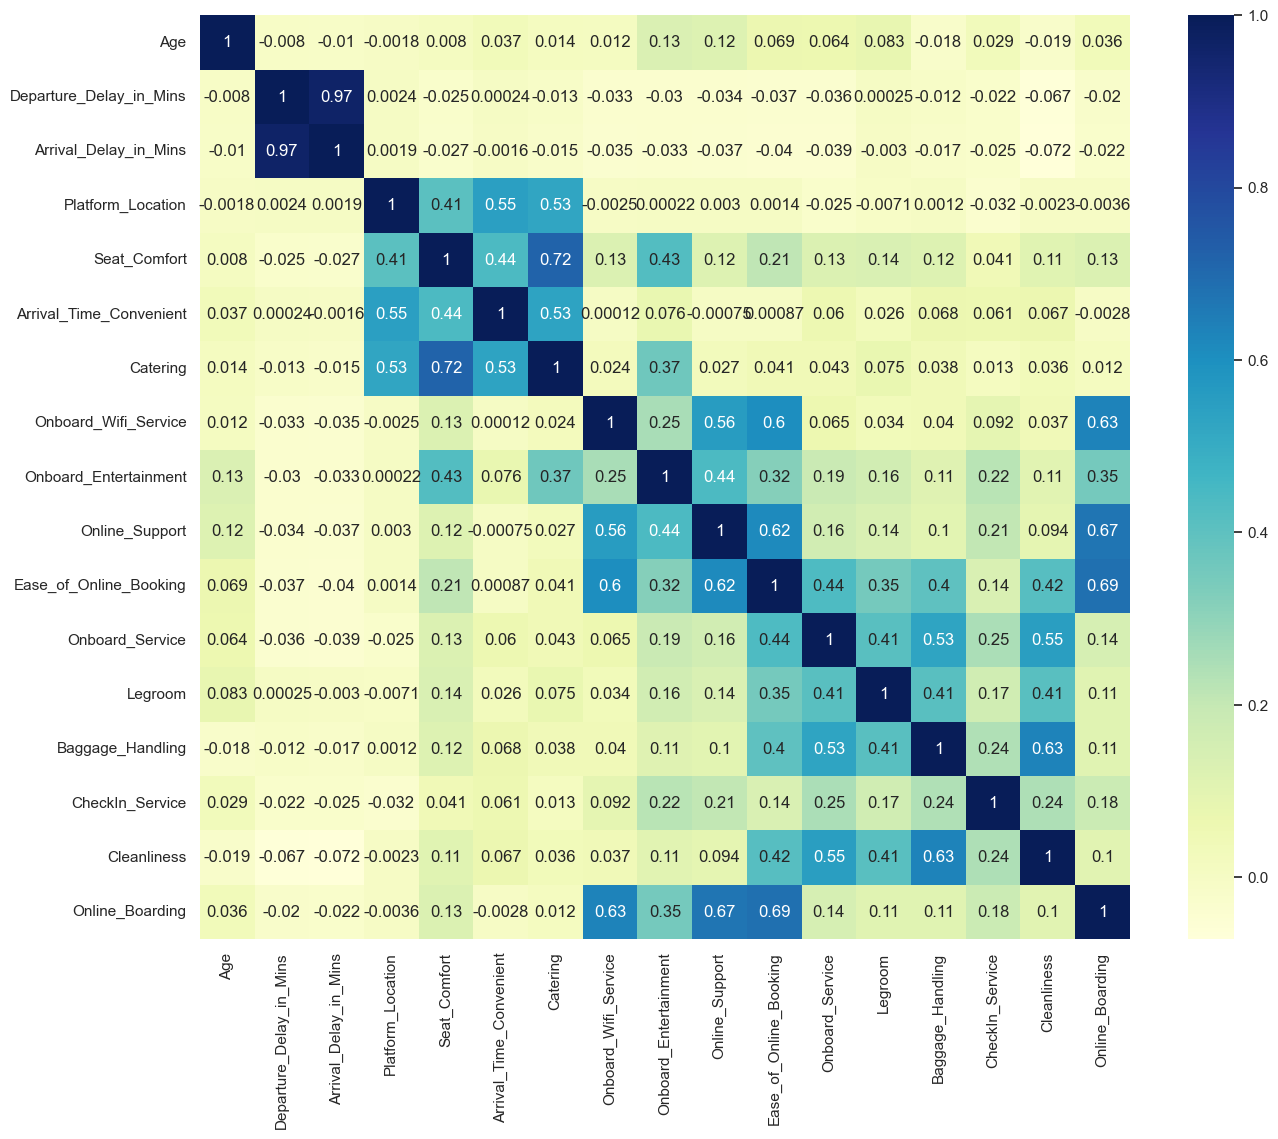

In [57]:
Corr_cols=['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

sns.set (rc = {'figure.figsize':(15, 12)})
dataplot = sns.heatmap(df_Train_v2[Corr_cols].corr(), cmap="YlGnBu", annot=True)
print("The correlation heatmap for the numerical variables:")
# displaying heatmap
plt.show()

In [21]:
#file_name = 'Data_Merged2.xlsx'
 
# saving the excel
#df1.to_excel(file_name)

## Data Processing for Model building 

In [58]:
X = df_Train_v2.drop(['Overall_Experience','ID'], axis=1)
Y = df_Train_v2['Overall_Experience']
X.head()

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,Business Travel,Business,Green Car,52.0,272,0.0,5.0,2.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,Male,Loyal Customer,Personal Travel,Eco,Ordinary,48.0,2200,9.0,0.0,1.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,Female,Loyal Customer,Business Travel,Business,Green Car,43.0,1061,77.0,119.0,2.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,Female,Loyal Customer,Business Travel,Business,Ordinary,44.0,780,13.0,18.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,Female,Loyal Customer,Business Travel,Business,Ordinary,50.0,1981,0.0,0.0,3.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [59]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,52.0,272,0.0,5.0,2.0,5.0,5.0,5.0,4.0,2.0,...,3.0,2.0,4.0,2.0,1.0,False,True,False,False,False
1,48.0,2200,9.0,0.0,1.0,5.0,1.0,2.0,4.0,1.0,...,2.0,1.0,2.0,4.0,4.0,True,True,True,True,True
2,43.0,1061,77.0,119.0,2.0,2.0,2.0,2.0,2.0,4.0,...,5.0,5.0,4.0,5.0,5.0,False,True,False,False,False
3,44.0,780,13.0,18.0,3.0,2.0,2.0,2.0,3.0,2.0,...,3.0,3.0,4.0,3.0,3.0,False,True,False,False,True
4,50.0,1981,0.0,0.0,3.0,3.0,3.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,False,True,False,False,True


In [60]:
print(X.dtypes)   

Age                             float64
Travel_Distance                   int64
Departure_Delay_in_Mins         float64
Arrival_Delay_in_Mins           float64
Seat_Comfort                    float64
Arrival_Time_Convenient         float64
Catering                        float64
Platform_Location               float64
Onboard_Wifi_Service            float64
Onboard_Entertainment           float64
Online_Support                  float64
Ease_of_Online_Booking          float64
Onboard_Service                 float64
Legroom                         float64
Baggage_Handling                float64
CheckIn_Service                 float64
Cleanliness                     float64
Online_Boarding                 float64
Gender_Male                        bool
Customer_Type_Loyal Customer       bool
Type_Travel_Personal Travel        bool
Travel_Class_Eco                   bool
Seat_Class_Ordinary                bool
dtype: object


In [61]:
X = X.astype({'Gender_Male': int, 'Customer_Type_Loyal Customer': int,'Type_Travel_Personal Travel':int,'Travel_Class_Eco':int,'Seat_Class_Ordinary':int})
X.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,52.0,272,0.0,5.0,2.0,5.0,5.0,5.0,4.0,2.0,...,3.0,2.0,4.0,2.0,1.0,0,1,0,0,0
1,48.0,2200,9.0,0.0,1.0,5.0,1.0,2.0,4.0,1.0,...,2.0,1.0,2.0,4.0,4.0,1,1,1,1,1
2,43.0,1061,77.0,119.0,2.0,2.0,2.0,2.0,2.0,4.0,...,5.0,5.0,4.0,5.0,5.0,0,1,0,0,0
3,44.0,780,13.0,18.0,3.0,2.0,2.0,2.0,3.0,2.0,...,3.0,3.0,4.0,3.0,3.0,0,1,0,0,1
4,50.0,1981,0.0,0.0,3.0,3.0,3.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,0,1,0,0,1


In [62]:
# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify = Y)

In [63]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of event variable in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of event variable in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (66065, 23)
Shape of test set :  (28314, 23)
Percentage of event variable in training set:
Overall_Experience
1    0.546659
0    0.453341
Name: proportion, dtype: float64
Percentage of event variable in test set:
Overall_Experience
1    0.546655
0    0.453345
Name: proportion, dtype: float64


## Model Building 

### Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [64]:
#Random forest with the Grid search optimized hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=12, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       random_state=0)

In [65]:
#Precdicting the Random Forest model on the Train dataset
y_pred_train_rfc =rfc.predict(X_train)

#Precdicting the Random Forest model on the Test dataset
y_pred_test_rfc = rfc.predict(X_test)

In [76]:
#x=pd.DataFrame(y_pred_test_rfc)
#x.head()

,0
0,0
1,0
2,0
3,0
4,0


In [66]:
from sklearn.metrics import accuracy_score

print("Accuracy Score in Train dataset using Random Forest Grid search optimized model:", round(accuracy_score(y_pred_train_rfc, y_train)*100 ,2), "%")
print("Accuracy Score in Test dataset using Random Forest Grid search optimized model:", round(accuracy_score(y_test, y_pred_test_rfc)*100 ,2), "%")

Accuracy Score in Train dataset using Random Forest Grid search optimized model: 95.27 %
Accuracy Score in Test dataset using Random Forest Grid search optimized model: 93.77 %


In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("In the Train dataset using Random Forest Grid search optimized model:\n")
print('F-1 Score : ',(f1_score(y_train, y_pred_train_rfc, average='micro')))
print('Precision Score : ',(precision_score(y_train, y_pred_train_rfc, average='micro')))
print('Recall Score : ',(recall_score(y_train, y_pred_train_rfc, average='micro')))
print('AUC : ',metrics.roc_auc_score(y_train, y_pred_train_rfc))

print("\n\n")
print("In the Test dataset using Random Forest Grid search optimized model:\n")
print('F-1 Score : ',(f1_score(y_test, y_pred_test_rfc, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_test_rfc, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_test_rfc, average='micro')))
print('AUC : ',metrics.roc_auc_score(y_test, y_pred_test_rfc))

In the Train dataset using Random Forest Grid search optimized model:

F-1 Score :  0.9527435101793688
Precision Score :  0.9527435101793688
Recall Score :  0.9527435101793688
AUC :  0.9531747799704015



In the Test dataset using Random Forest Grid search optimized model:

F-1 Score :  0.9376633467542559
Precision Score :  0.9376633467542559
Recall Score :  0.9376633467542559
AUC :  0.9379569232273345


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature Name'>

Text(0.5, 1.0, 'Top 10 Feature Importance Each Attributes (Random Forest Grid search optimized model)')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature Name')

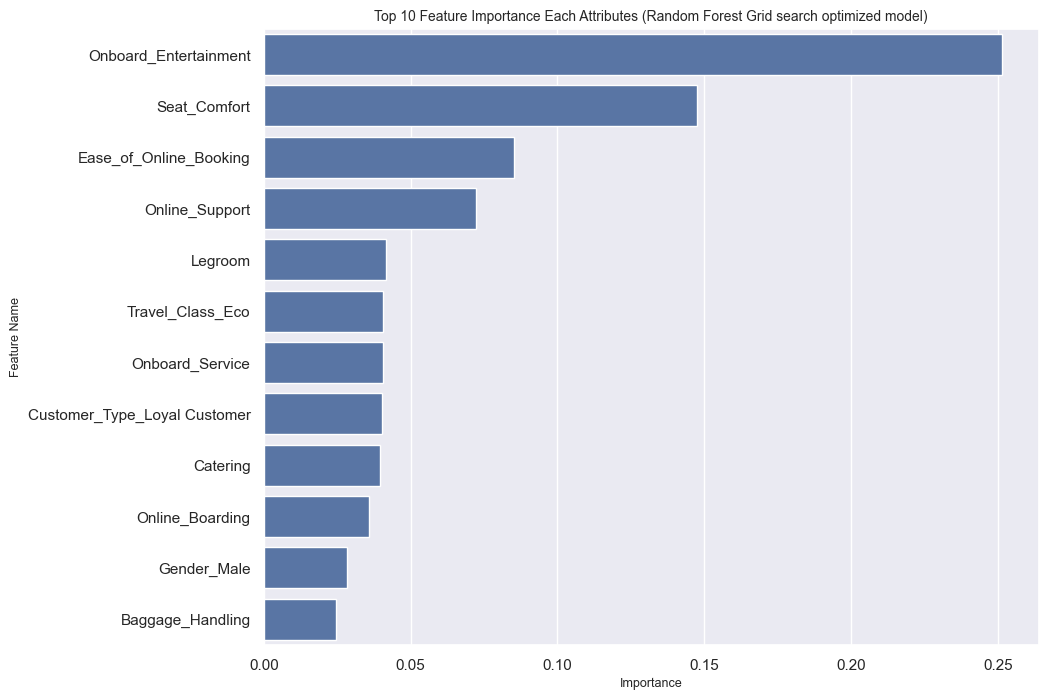

In [68]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(12)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest Grid search optimized model)', fontsize=10)
plt.xlabel ('Importance', fontsize=9)
plt.ylabel ('Feature Name', fontsize=9)
plt.show()


In [ ]:
#import shap
#plt.title('Shapley values for the features (Random Forest Grid search optimized model)', fontsize=10)
#explainer = shap.TreeExplainer(rfc)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values[1], X_test)

Text(0.5, 1.0, 'Shapley values for the features (Random Forest Grid search optimized model)')

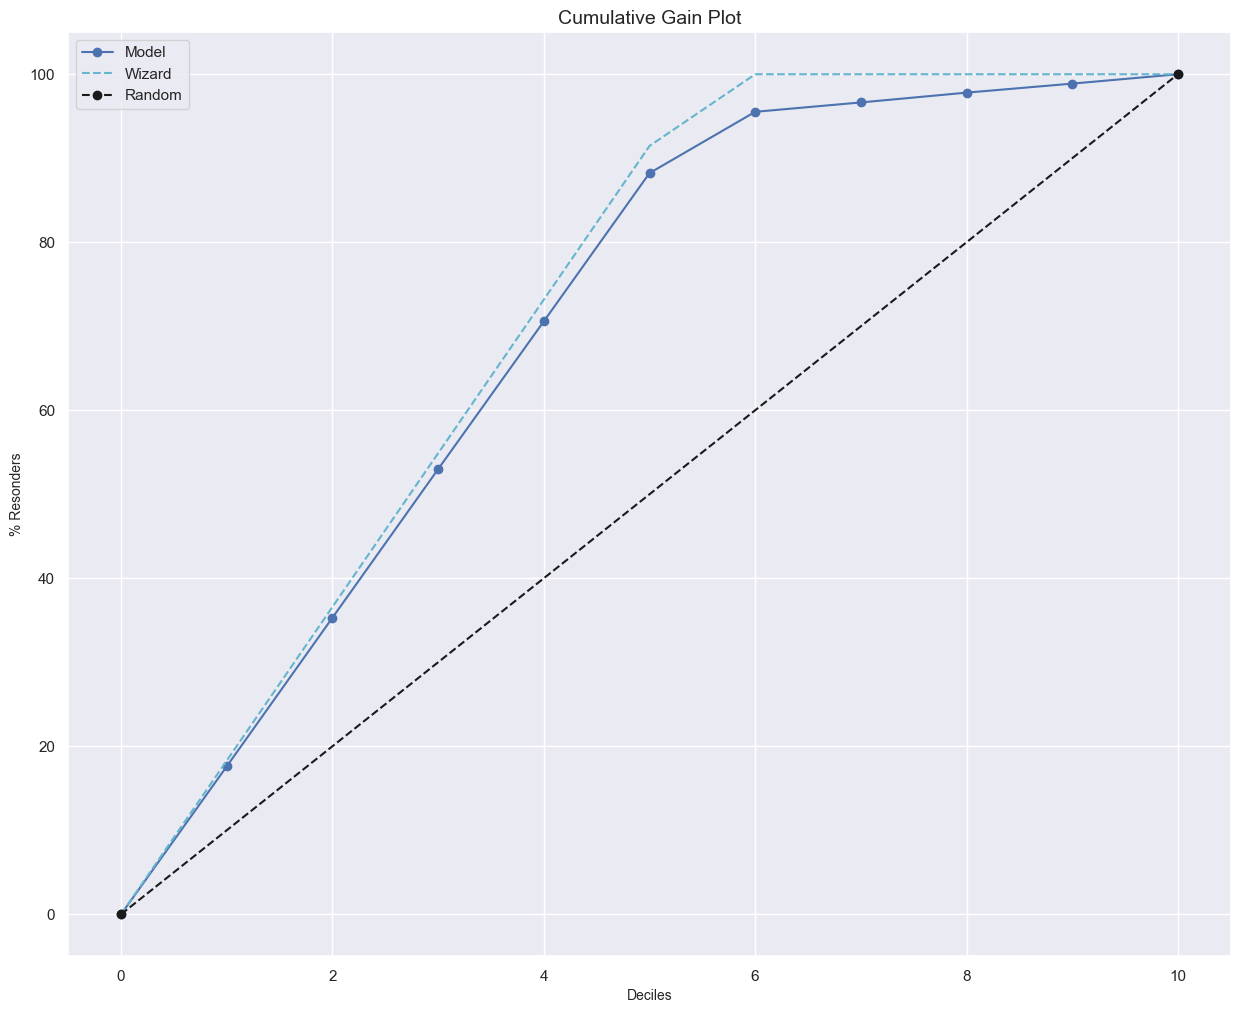

In [69]:
#Gain chart on the Train data - Random Forest optimized model
figsize=(8,4)
import kds
kds.metrics.plot_cumulative_gain(y_train, y_pred_train_rfc)

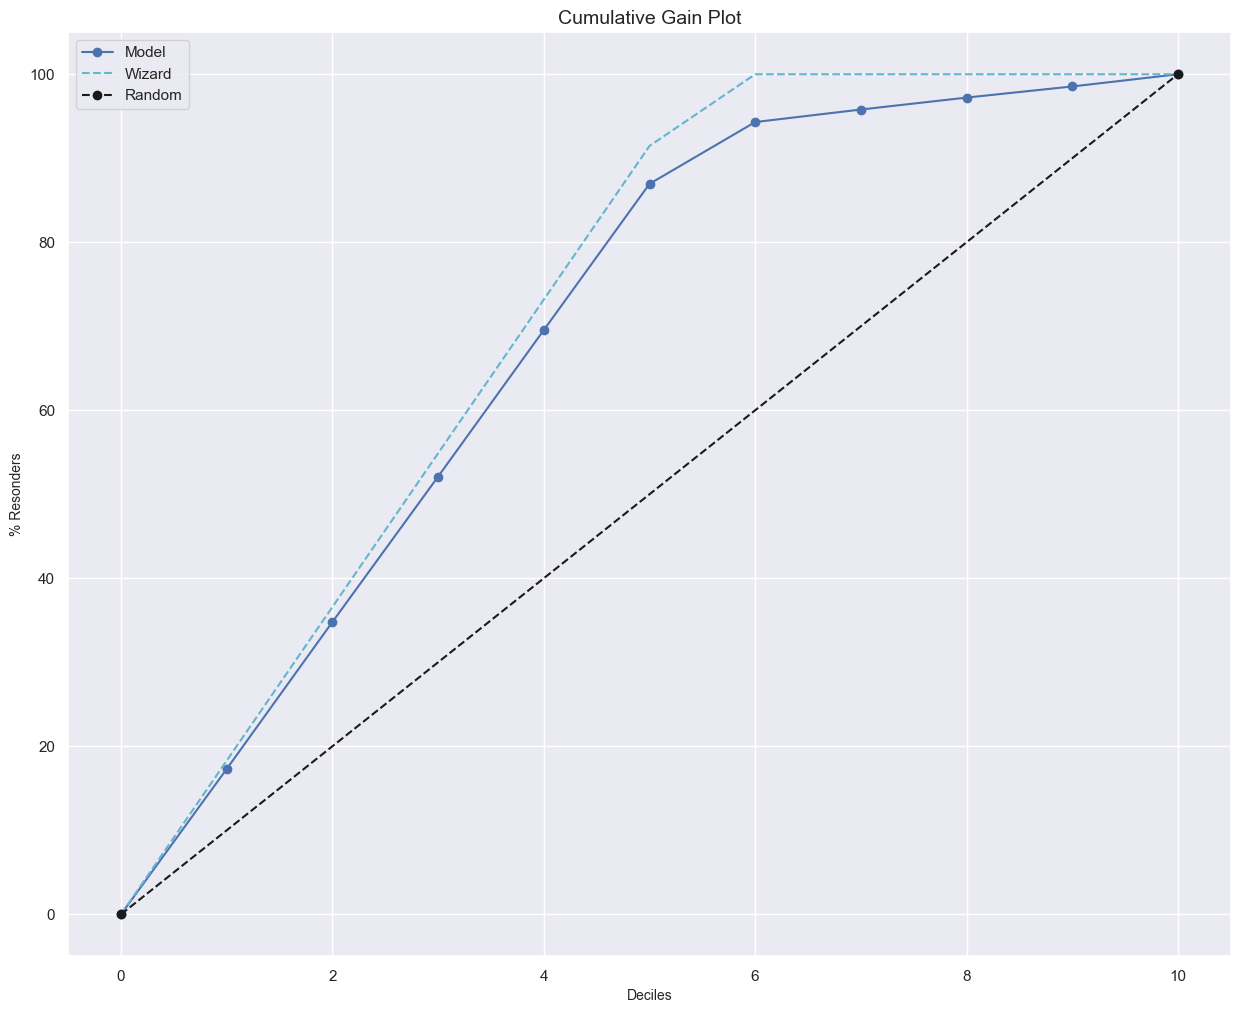

In [70]:
#Gain chart on the Test data - Random Forest optimized model
import kds
kds.metrics.plot_cumulative_gain(y_test, y_pred_test_rfc)

## Xtreme Gradient Boost 

In [57]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [12, 14, 16, 18, 20],
    'learning_rate': [0.1, 0.01, 0.05],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring = 'roc_auc', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search_xgb.best_params_)

print(grid_search_xgb.best_estimator_)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [12, 14, 16, 18, 20],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             scoring='roc_auc')

{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200, 'random_state': 0}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [72]:
#XGB with the Grid search optimized hyperparameters
xgb = XGBClassifier(random_state=0, max_depth=12, n_estimators=200,learning_rate= 0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [73]:
#Precdicting the Random Forest model on the Train dataset
y_pred_train_xgb =xgb.predict(X_train)

#Precdicting the Random Forest model on the Test dataset
y_pred_test_xgb = xgb.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

print("Accuracy Score in Train dataset using Random Forest Grid search optimized model:", round(accuracy_score(y_pred_train_xgb, y_train)*100 ,2), "%")
print("Accuracy Score in Test dataset using Random Forest Grid search optimized model:", round(accuracy_score(y_test, y_pred_test_xgb)*100 ,2), "%")

Accuracy Score in Train dataset using Random Forest Grid search optimized model: 99.94 %
Accuracy Score in Test dataset using Random Forest Grid search optimized model: 95.62 %


In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("In the Train dataset using Random Forest Grid search optimized model:\n")
print('F-1 Score : ',(f1_score(y_train, y_pred_train_xgb, average='micro')))
print('Precision Score : ',(precision_score(y_train, y_pred_train_xgb, average='micro')))
print('Recall Score : ',(recall_score(y_train, y_pred_train_xgb, average='micro')))
print('AUC : ',metrics.roc_auc_score(y_train, y_pred_train_xgb))

print("\n\n")
print("In the Test dataset using Random Forest Grid search optimized model:\n")
print('F-1 Score : ',(f1_score(y_test, y_pred_test_xgb, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_test_xgb, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_test_xgb, average='micro')))
print('AUC : ',metrics.roc_auc_score(y_test, y_pred_test_xgb))

In the Train dataset using Random Forest Grid search optimized model:

F-1 Score :  0.999394535684553
Precision Score :  0.999394535684553
Recall Score :  0.999394535684553
AUC :  0.9994063158936037



In the Test dataset using Random Forest Grid search optimized model:

F-1 Score :  0.9562054107508653
Precision Score :  0.9562054107508653
Recall Score :  0.9562054107508653
AUC :  0.9566053322459193


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature Name'>

Text(0.5, 1.0, 'Top 10 Feature Importance Each Attributes (XGB Grid search optimized model)')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature Name')

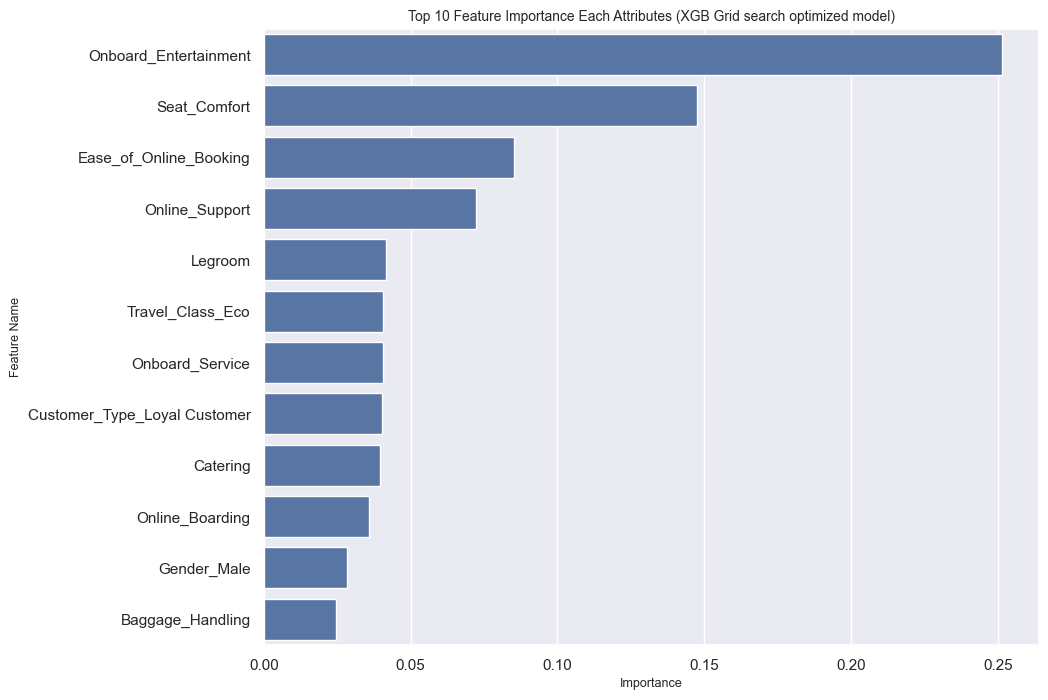

In [76]:
imp_df_xgb = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi_xgb = imp_df_xgb.sort_values(by="Importance", ascending=False)

fi2_xgb = fi_xgb.head(12)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (XGB Grid search optimized model)', fontsize=10)
plt.xlabel ('Importance', fontsize=9)
plt.ylabel ('Feature Name', fontsize=9)
plt.show()


## Light Gradient Boost 

In [70]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [71]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [74]:
params = {
    'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': -1, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [100, 200],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [0,42],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid_lgb = GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1)
# Run the grid
grid_lgb.fit(X_train, y_train)

# Print the best parameters found
print(grid_lgb.best_params_)
print(grid_lgb.best_score_)

Fitting 4 folds for each of 4608 candidates, totalling 18432 fits


## Data Handling the Test dataset - readying for Prediction 

In [77]:
df_Test_copy = df_Test.copy(deep = True)
df_Test_copy.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [78]:
event_dictionary ={'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2,'Acceptable':3, 'Good':4,'Excellent':5}

Rating_cols = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

for col in Rating_cols:
    df_Test_copy[col] = df_Test_copy[col].map(event_dictionary)
    

df_Test_copy.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


In [79]:
event_dictionary2 ={'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2,'Manageable':3, 'Convenient':4,'Very Convenient':5}

df_Test_copy['Platform_Location'] = df_Test_copy['Platform_Location'].map(event_dictionary2)

df_Test_copy.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


In [80]:
df_Test_copy_v2=df_Test_copy.drop(['Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Class'], axis=1)

In [81]:
# Create kernels.  #mice forest
kernel = mf.ImputationKernel(
  data=df_Test_copy_v2,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)
print(kernel)
completed_dataset_Test = kernel.complete_data(dataset=0, inplace=False)


#Knn Imputation
impute = KNNImputer() #KNN imputation
KNNImputed_Test = impute.fit_transform(df_Test_copy_v2)
KNNImputed_Test = pd.DataFrame(KNNImputed_Test, columns = df_Test_copy_v2.columns).round(1)

Initialized logger with name mice 1-3
Dataset 0
1  | Cleanliness | Online_Boarding | Onboard_Entertainment | Age | Platform_Location | Onboard_Wifi_Service | Ease_of_Online_Booking | Seat_Comfort | CheckIn_Service | Legroom | Online_Support | Departure_Delay_in_Mins | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Arrival_Time_Convenient | Catering
2  | Cleanliness | Online_Boarding | Onboard_Entertainment | Age | Platform_Location | Onboard_Wifi_Service | Ease_of_Online_Booking | Seat_Comfort | CheckIn_Service | Legroom | Online_Support | Departure_Delay_in_Mins | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Arrival_Time_Convenient | Catering
3  | Cleanliness | Online_Boarding | Onboard_Entertainment | Age | Platform_Location | Onboard_Wifi_Service | Ease_of_Online_Booking | Seat_Comfort | CheckIn_Service | Legroom | Online_Support | Departure_Delay_in_Mins | Baggage_Handling | Arrival_Delay_in_Mins | Onboard_Service | Arrival_Time_Convenient | Catering



<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Catering', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Onboard_Service', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='Baggage_Handling', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

<Axes: xlabel='CheckIn_Service', ylabel='Density'>

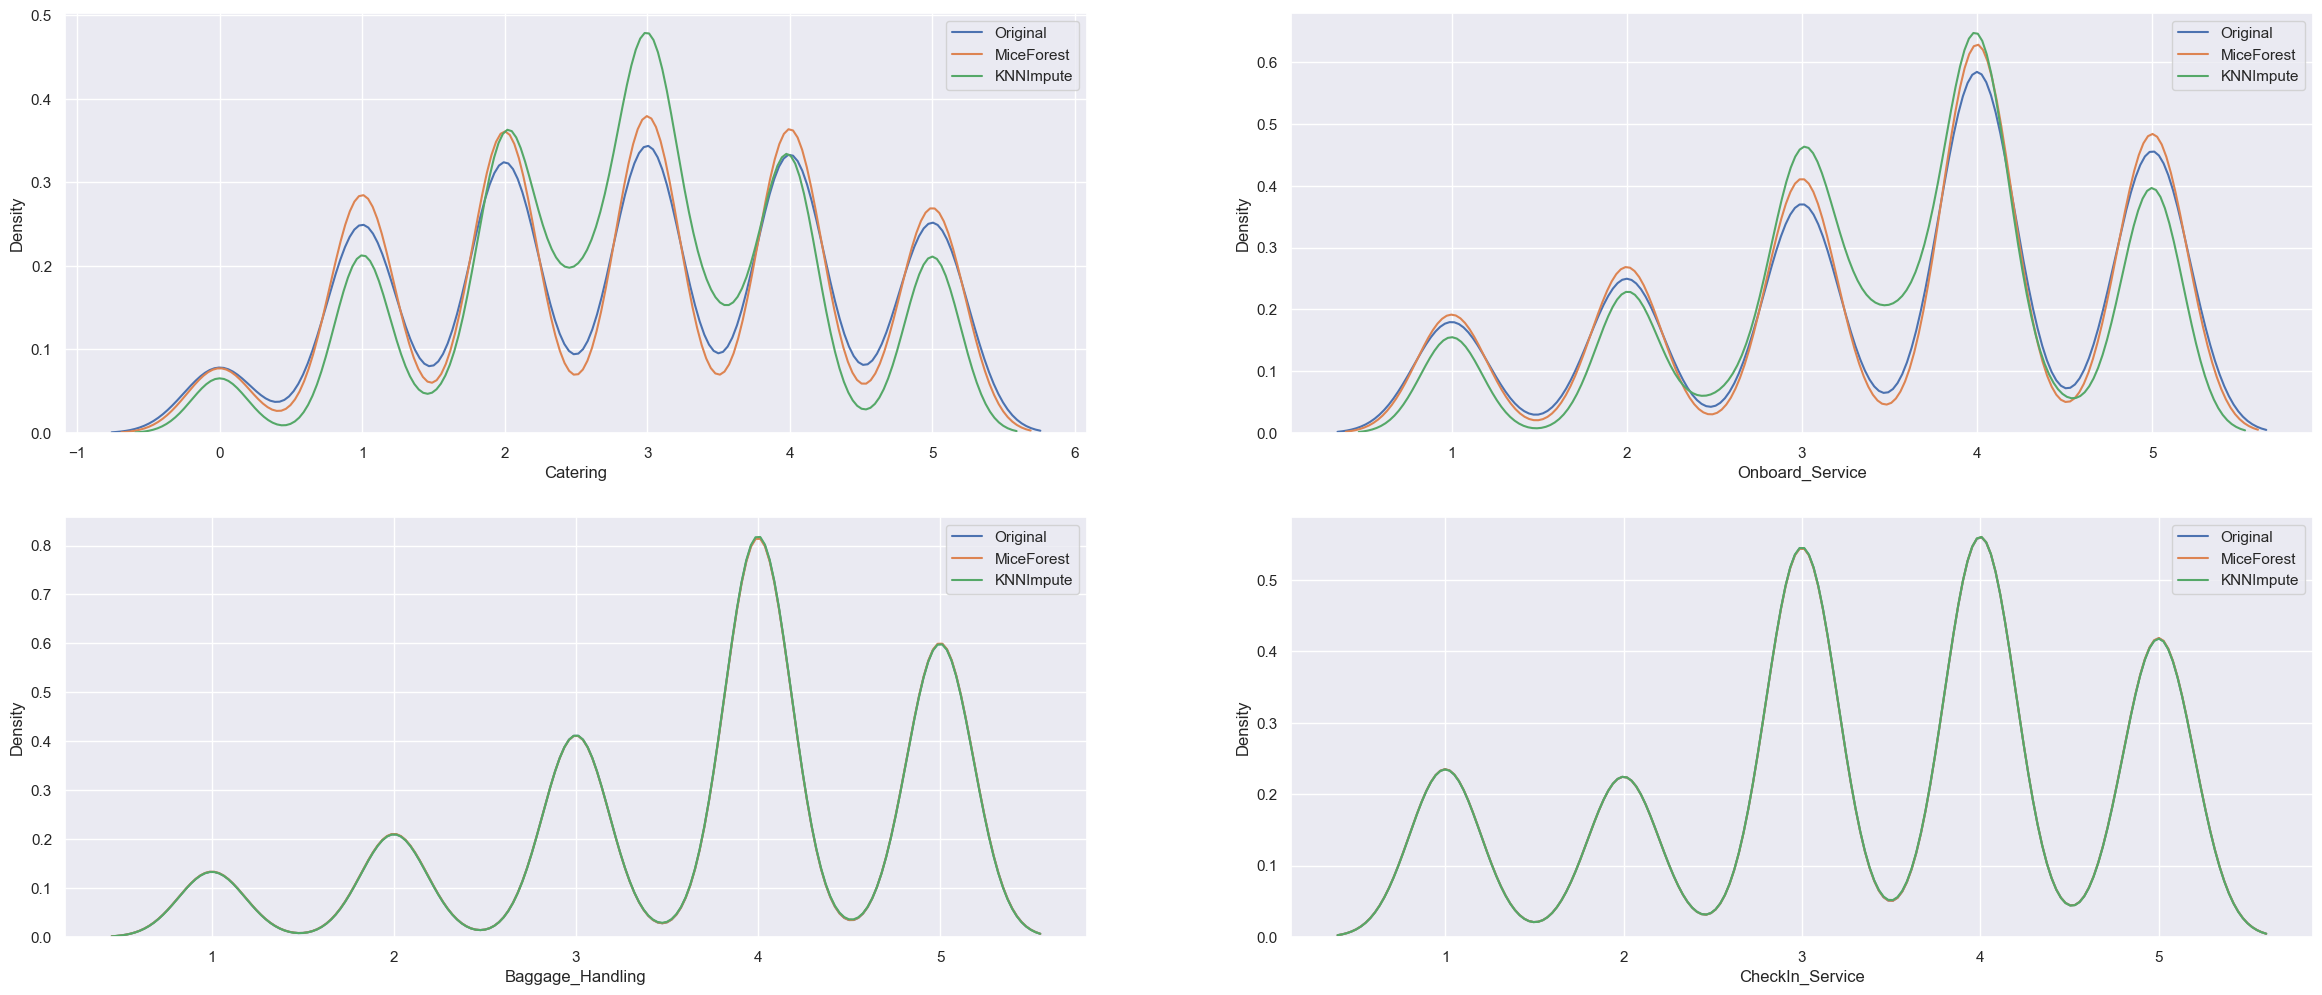

In [82]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(29,12),nrows=2, ncols=2)
for col,i,j in zip(['Catering','Onboard_Service', 'Baggage_Handling','CheckIn_Service'],[0,0,1,1],[0,1,0,1]):
    sns.kdeplot(x = df_Test_copy_v2[col][df_Test_copy_v2.isnull().any(axis=1)], label= 'Original', ax=ax[i][j] )
    
    sns.kdeplot(x = completed_dataset_Test[col][df_Test_copy_v2.isnull().any(axis=1)], label = 'MiceForest', ax=ax[i][j] )
    sns.kdeplot(x = KNNImputed_Test[col][df_Test_copy_v2.isnull().any(axis=1)], label='KNNImpute',  ax=ax[i][j] )
    ax[i][j].legend()

In [83]:
selected_columns =['ID','Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Class']
Test_new_df = df_Test_copy[selected_columns].copy()
Test_new_df.head()

,ID,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class
0,99900001,Female,NaN,Business Travel,Business,Green Car
1,99900002,Female,Disloyal Customer,Business Travel,Business,Ordinary
2,99900003,Male,Loyal Customer,Business Travel,Business,Ordinary
3,99900004,Female,Loyal Customer,Personal Travel,Eco,Green Car
4,99900005,Male,Disloyal Customer,Business Travel,Business,Ordinary


In [84]:
#Using MICE technique to impute/treat the missing values in Numerical variables and the Survey feedback variables
df_Test_v2 = pd.merge(Test_new_df,completed_dataset_Test,on="ID",how="inner")

# Rows in Merged data
print("number of rows in Survey dataset : ", df_Test_v2.shape[0])

# Columns in Merged data
print("number of rows in Survey dataset : ", df_Test_v2.shape[1])

df_Test_v2.head()

number of rows in Survey dataset :  35602
number of rows in Survey dataset :  24


,ID,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,Business Travel,Business,Green Car,36.0,532,0.0,0.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,Female,Disloyal Customer,Business Travel,Business,Ordinary,21.0,1425,9.0,28.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,Male,Loyal Customer,Business Travel,Business,Ordinary,60.0,2832,0.0,0.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,Female,Loyal Customer,Personal Travel,Eco,Green Car,29.0,1352,0.0,0.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,Male,Disloyal Customer,Business Travel,Business,Ordinary,18.0,1610,17.0,0.0,...,5.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0


In [85]:
df_Test_v2['Gender'].mode()[0]
df_Test_v2['Type_Travel'].mode()[0]
df_Test_v2['Customer_Type'].mode()[0]

'Female'

'Business Travel'

'Loyal Customer'

In [86]:
#Filling the missing values in categorical variables by the Mode value of the variables
df_Test_v2['Gender'] = df_Test_v2['Gender'].fillna(df_Test_v2['Gender'].mode()[0])
df_Test_v2['Type_Travel'] = df_Test_v2['Type_Travel'].fillna(df_Test_v2['Type_Travel'].mode()[0])
df_Test_v2['Customer_Type'] = df_Test_v2['Customer_Type'].fillna(df_Test_v2['Customer_Type'].mode()[0])

In [87]:
print("Count total NaN at each column in a DataFrame: \n ", df_Test_v2.isnull().sum())

Count total NaN at each column in a DataFrame: 
  ID                         0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Class                 0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


#### No Blank value in any of the columns. All the columns have been corrected for missing values 

In [37]:
file_name = 'Post_Imputation_Test.xlsx'
 
# saving the excel
df_Test_v2.to_excel(file_name)

## Evaluating the Test dataset post imputation 

In [88]:
EDA_cols = ['Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

for col in EDA_cols:
    print("-----------Column is:",col,"---------------")
    #pd.set_option('display.float_format', '{:.1%}'.format)
    display(df_Test_v2[col].value_counts(normalize=True).sort_index())


-----------Column is: Platform_Location ---------------


Platform_Location
1.0    0.172350
2.0    0.188388
3.0    0.263075
4.0    0.229790
5.0    0.146396
Name: proportion, dtype: float64

-----------Column is: Seat_Comfort ---------------


Seat_Comfort
0.0    0.037357
1.0    0.161704
2.0    0.220072
3.0    0.225015
4.0    0.219426
5.0    0.136425
Name: proportion, dtype: float64

-----------Column is: Arrival_Time_Convenient ---------------


Arrival_Time_Convenient
0.0    0.051598
1.0    0.159598
2.0    0.175945
3.0    0.180917
4.0    0.227600
5.0    0.204342
Name: proportion, dtype: float64

-----------Column is: Catering ---------------


Catering
0.0    0.045672
1.0    0.162041
2.0    0.208331
3.0    0.221139
4.0    0.207769
5.0    0.155047
Name: proportion, dtype: float64

-----------Column is: Onboard_Wifi_Service ---------------


Onboard_Wifi_Service
0.0    0.001152
1.0    0.111848
2.0    0.209426
3.0    0.210606
4.0    0.245717
5.0    0.221252
Name: proportion, dtype: float64

-----------Column is: Onboard_Entertainment ---------------


Onboard_Entertainment
0.0    0.023398
1.0    0.088956
2.0    0.148278
3.0    0.187574
4.0    0.321330
5.0    0.230465
Name: proportion, dtype: float64

-----------Column is: Online_Support ---------------


Online_Support
1.0    0.105865
2.0    0.133700
3.0    0.165805
4.0    0.323044
5.0    0.271586
Name: proportion, dtype: float64

-----------Column is: Ease_of_Online_Booking ---------------


Ease_of_Online_Booking
0.0    0.000056
1.0    0.103253
2.0    0.153868
3.0    0.169373
4.0    0.309814
5.0    0.263637
Name: proportion, dtype: float64

-----------Column is: Onboard_Service ---------------


Onboard_Service
1.0    0.103421
2.0    0.134037
3.0    0.208022
4.0    0.312539
5.0    0.241981
Name: proportion, dtype: float64

-----------Column is: Legroom ---------------


Legroom
0.0    0.002893
1.0    0.085023
2.0    0.168361
3.0    0.170917
4.0    0.304758
5.0    0.268047
Name: proportion, dtype: float64

-----------Column is: Baggage_Handling ---------------


Baggage_Handling
1.0    0.061907
2.0    0.102972
3.0    0.187883
4.0    0.373546
5.0    0.273692
Name: proportion, dtype: float64

-----------Column is: CheckIn_Service ---------------


CheckIn_Service
1.0    0.118645
2.0    0.119769
3.0    0.273664
4.0    0.280574
5.0    0.207348
Name: proportion, dtype: float64

-----------Column is: Cleanliness ---------------


Cleanliness
1.0    0.060053
2.0    0.101315
3.0    0.183557
4.0    0.377001
5.0    0.278074
Name: proportion, dtype: float64

-----------Column is: Online_Boarding ---------------


Online_Boarding
0.0    0.000056
1.0    0.118280
2.0    0.144262
3.0    0.233779
4.0    0.271895
5.0    0.231729
Name: proportion, dtype: float64

## Data Processing the Test dataset for Model Prediction 

In [89]:
X_For_Pred = df_Test_v2.drop(['ID'], axis=1)
X_For_Pred.head()

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,Business Travel,Business,Green Car,36.0,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,Female,Disloyal Customer,Business Travel,Business,Ordinary,21.0,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,Male,Loyal Customer,Business Travel,Business,Ordinary,60.0,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,Female,Loyal Customer,Personal Travel,Eco,Green Car,29.0,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,Male,Disloyal Customer,Business Travel,Business,Ordinary,18.0,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0


In [90]:
X_For_Pred = pd.get_dummies(X_For_Pred, drop_first = True)
X_For_Pred.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,36.0,532,0.0,0.0,3.0,3.0,3.0,3.0,2.0,5.0,...,5.0,5.0,4.0,5.0,1.0,False,True,False,False,False
1,21.0,1425,9.0,28.0,0.0,4.0,1.0,3.0,3.0,1.0,...,3.0,4.0,3.0,5.0,3.0,False,False,False,False,True
2,60.0,2832,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,2.0,4.0,2.0,5.0,True,True,False,False,True
3,29.0,1352,0.0,0.0,3.0,5.0,3.0,5.0,1.0,3.0,...,2.0,5.0,5.0,5.0,1.0,False,True,True,True,False
4,18.0,1610,17.0,0.0,5.0,0.0,5.0,2.0,5.0,5.0,...,3.0,5.0,5.0,5.0,5.0,True,False,False,False,True


In [91]:
X_For_Pred = X_For_Pred.astype({'Gender_Male': int, 'Customer_Type_Loyal Customer': int,'Type_Travel_Personal Travel':int,'Travel_Class_Eco':int,'Seat_Class_Ordinary':int})
X_For_Pred.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,36.0,532,0.0,0.0,3.0,3.0,3.0,3.0,2.0,5.0,...,5.0,5.0,4.0,5.0,1.0,0,1,0,0,0
1,21.0,1425,9.0,28.0,0.0,4.0,1.0,3.0,3.0,1.0,...,3.0,4.0,3.0,5.0,3.0,0,0,0,0,1
2,60.0,2832,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,2.0,4.0,2.0,5.0,1,1,0,0,1
3,29.0,1352,0.0,0.0,3.0,5.0,3.0,5.0,1.0,3.0,...,2.0,5.0,5.0,5.0,1.0,0,1,1,1,0
4,18.0,1610,17.0,0.0,5.0,0.0,5.0,2.0,5.0,5.0,...,3.0,5.0,5.0,5.0,5.0,1,0,0,0,1


## Neural network 

In [101]:
pip install tensorflow


     -------------------------------------- 284.1/284.1 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 130.2

In [107]:
pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [108]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install tensorflow==2.12.0

     -------------------------------------- 272.8/272.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\argop\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



### Model 1 (neural network) 

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [111]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [113]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['precision'])
    return model

In [114]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [123]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits


ValueError: Invalid parameter lr for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(lr=0.01)`
Check the list of available parameters with `estimator.get_params().keys()`

In [116]:
estimator_v5=create_model_v5(batch_size=64,lr=0.01)

estimator_v5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [124]:
optimizer = tf.keras.optimizers.Adam(0.01)
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['precision'])
#history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

885/885 [==============================] - 3s 3ms/step
Best Threshold=0.000000, G-Mean=0.526


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

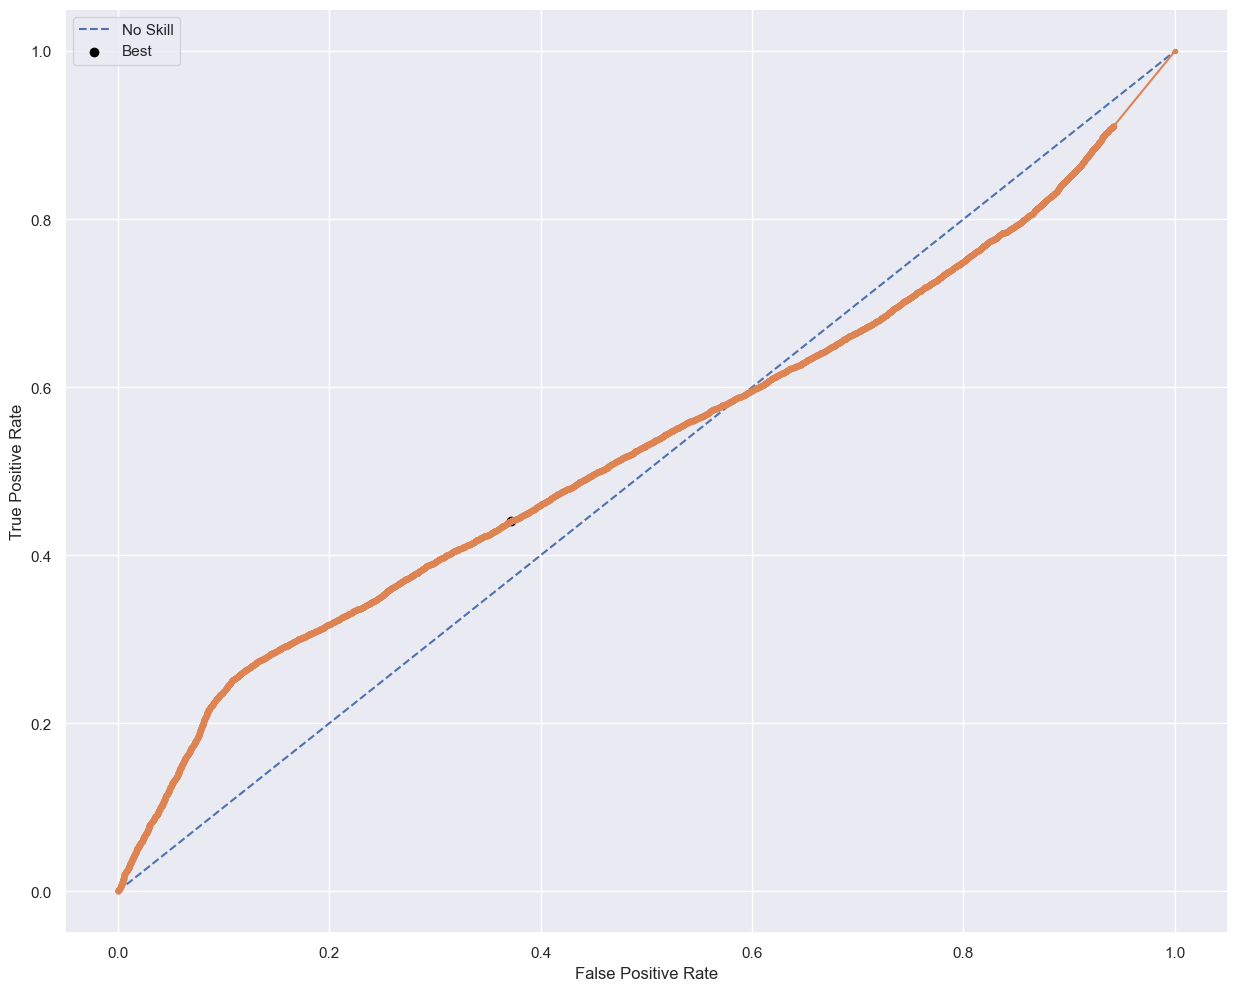

In [125]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [126]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

885/885 [==============================] - 3s 3ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [127]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.48      0.63      0.55     12836
           1       0.59      0.44      0.50     15478

    accuracy                           0.53     28314
   macro avg       0.54      0.53      0.52     28314
weighted avg       0.54      0.53      0.52     28314



## Predicting in the Test data for Final Submission

In [92]:
#Using Extreme Gradient Boost technique for Prediction since its giving better result than Random Forest
y_Pred_xgb = xgb.predict(X_For_Pred)

In [93]:
Prediction=pd.DataFrame(y_Pred_xgb)
Prediction.info()
Prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       35602 non-null  int32
dtypes: int32(1)
memory usage: 139.2 KB


,0
0,1
1,1
2,1
3,0
4,1


In [62]:
file_name = 'Prediction_Testing.xlsx'
 
# saving the excel
Prediction.to_excel(file_name)

In [94]:
df_Test_ID=df_Test_v2[['ID']].copy()
df_Test_ID.info()
df_Test_ID.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      35602 non-null  int64
dtypes: int64(1)
memory usage: 278.3 KB


,ID
0,99900001
1,99900002
2,99900003
3,99900004
4,99900005


In [95]:
Prediction_v2=pd.concat([df_Test_ID, Prediction], axis=1)
Prediction_v2.head()

,ID,0
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [97]:
Prediction_final = Prediction_v2.rename(columns={0:'Overall_Experience'})
Prediction_final.info()
Prediction_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  35602 non-null  int64
 1   Overall_Experience  35602 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 417.3 KB


,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [98]:
file_name = 'Final_Submission_Pusparghya_Pakrasi.xlsx'
 
# saving the excel
Prediction_final.to_excel(file_name)